##**Introduction & Objective**##

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. I have this data about the leads and their various aspects, we will delve into this data to :
* Find the factors driving the lead conversion process
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Create a profile of the leads which are likely to convert


##**Data Description**##

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Importing necessary libraries and data**

Before starting to work on this data analysis and model building project we will import the necessary libraries, that will empower us with the varoius tools that will help us in dwelling into this Edtech data efficiently while driving insights from it.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading** **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
Edtech = pd.read_csv("/content/drive/MyDrive/MIT - Python/ExtraaLearn.csv")

In [ ]:
# Checking the number of rows and columns in the data
Edtech.shape

(4612, 15)

**Observations:**

There are 4612 observations and 15 columns in the dataset.

## **Data Overview**

- Observations
- Sanity checks

In [ ]:
# Let's create a copy of the data
data = Edtech.copy()

In [ ]:
# Let's view the first 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
# Let's view the last 5 rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Checking the info of the dataset

In [ ]:
# Let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**



*   There are no missing values in given dataset.
*   There are total 14 Independent variable and 1 (status) target variable.
*   of the 14 Independent Variable, 10 are object type, rest are int or float






### Checking for Unique and Duplicate values and Missing Values**

In [ ]:
data.nunique(axis=0)

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [ ]:
data.duplicated().sum()

0

**Observation:**



*   There are no duplicate entries in the data.



## **Univariate analysis of numerical columns**

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


#### **Observations:**



*  **Age** : Average age of leads is 46 years and it has a wide range from 18 to 63 years. More than 25% and less than 75% of the lead are between age 36 to 51 years.
*   **Website_visits** : On Average a lead visits the website 4 times, Maximum number of times any lead has visited the website is 30 times.
*   **time_spent_on_website** : On an average any customer spends 12 minutes on the website. Maximum time spend by any lead is 42 mins.
*   **Page_views_per_visits** : On an average any customer views 3 pages, minimum being 0 and maximum being 18 pages.
*   **Status** : This is out target variable.








### Lets check the total number of leads that converted into paid customer and that did not.

In [ ]:
df = data.groupby("status")["age"].count().reset_index(name="count")
print(df)
type(df)

   status  count
0       0   3235
1       1   1377


pandas.core.frame.DataFrame

<Axes: xlabel='status', ylabel='count'>

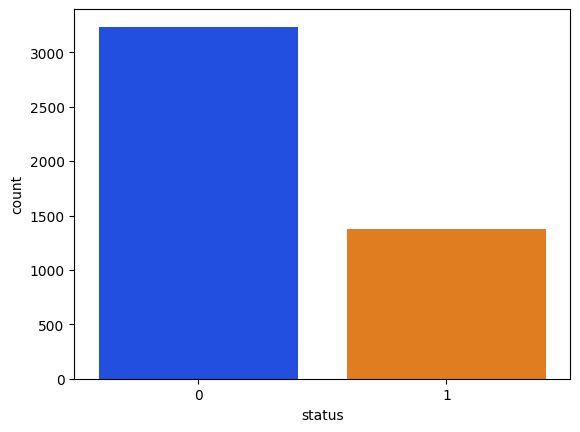

In [ ]:
sns.barplot( data = df , x = df["status"], y = df["count"], palette = "bright" )

#### $$**Observation :**$$
As we delve into the insights provided by the groupby table and observe the visual representation through the barplot, a clear and sobering picture emerges. Among the 4612 leads who interacted with Extraalearn, only 1377 decided to take the leap and transform into paid customers. This revelation highlights a pronounced disparity, underscoring the highly imbalanced nature of the data. The conversion rate, standing as a mere fraction of the total interactions, reflects the uphill battle faced in steering leads towards the paid customer category.

From an analytical perspective, this imbalance is a critical consideration. Imbalanced data can potentially skew the model's learning process and affect its predictive performance. It's akin to teaching a classroom full of students where only a handful have turned in their assignments. The challenge lies in striking a balance between addressing this imbalance and ensuring accurate predictions, emphasizing the significance of employing appropriate techniques to mitigate its impact.

## **Univariate analysis for categorical variables**

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
# Printing the % sub categories of each category

for i in data.describe(include=["object"]):
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in ID are :
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
**************************************************
Unique values in current_occupation are :
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
**************************************************
Unique values in first_interaction are :
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
**************************************************
Unique values in profile_completed are :
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
**************************************************
Unique values in last_activity are :
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
**************************************************
Unique v

#### **Observations:**



*  ID is the unique ID assigned to each customer to connects with Extraalearn, this will not play any vital role in model building so it will be dropped while data preprocessing
*  Most of the Leads are Professionals, followed by unemployed which is then followed by Students.
*  Website and mobile app are equally contributing in the first interaction with the leads.
*  Most of the Profile are fully completed.
*  Most of the recent interteractions with the Leads have been through Emails
*  Print media type 1 are Newspaper, Print media type 2 are Magazines.
*  497 leads had seen the ad of ExtraaLearn in the Newspaper.
*  233 leads had seen the ad of ExtraaLearn in the Newspaper.
*  527 leads had seen the ad of ExtraaLearn in the digital media and 705 leads had seen the ad of ExtraaLearn in the Educational channel.
*  only 93 leads came through referal.










# **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


**Certainly, here are the key aspects we will examine in the data:**

- **Current Occupation's Influence on Lead Status:**
We will investigate how a lead's current occupation impacts their expectations and their likelihood to participate in our program.

- **Impact of First Interaction Channels on Lead Status:**
We will assess whether the initial channels of interaction with our company have a noticeable effect on the status of our leads.

- **Effectiveness of Interaction Channels:**
We will analyze the performance of various interaction channels to identify which ones are most effective in converting leads.

- **Conversion Rates by Lead Sources:**
We will examine the conversion rates associated with different lead sources, such as print media, digital media, and referrals.

- **Prospect Information and Conversion Probability:**
We will explore whether having more comprehensive information about prospects enhances the likelihood of conversion. This includes details such as interests, preferences, and demographics.

###By scrutinizing these factors within our data, we aim to gain valuable insights that will inform our strategies for lead generation and conversion optimization.###

## **DataPreprocessing**


*  Dropping column ID
*  Changing data type for status column from int to object.





In [ ]:
data["status"]=data["status"].astype("int")


In [ ]:
data.drop(["ID"],axis=1,inplace=True)##dropping the Id column since it is just a unique id given to all th leads and is not signinificant for analysis or model building.


In [ ]:
data.info()# listing all the column to understand the dtatype and if any missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

## **Univariate analysis**

#### Let's explore these variables in some more depth by observing their distributions

##### **1.Age**

This variable tells the age of the lead,tnailoring marketing and sales approaches to age groups can boost conversion rates by meeting specific needs and expectations. Understanding the role of age is essential for effective lead conversion strategies.
Lets dwell into this variable.

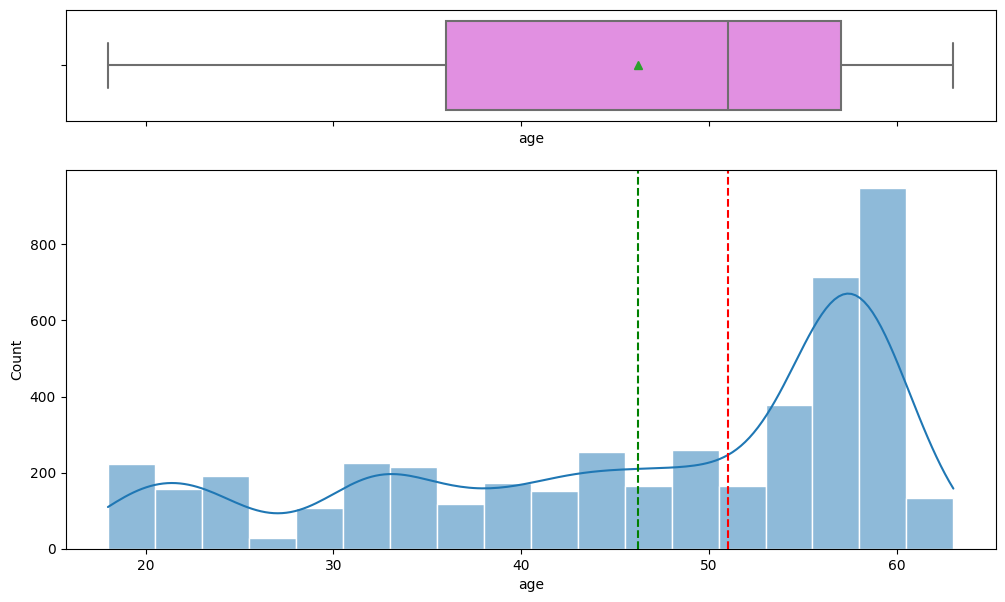

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.25, .85)}, figsize=(12, 7))
sns.set_style("dark")

# Add a graph in each part
sns.boxplot(data=data, x="age", ax=ax_box, showmeans=True, color='violet')
sns.histplot(data=data, x="age", kde=True, ax=ax_hist)
ax_hist.axvline(data["age"].mean(), color="green", linestyle="--")
ax_hist.axvline(data["age"].median(), color="red", linestyle="--")
ax_box.set(xlabel='age')
plt.show()


###**$$Observation$$**

1. The age variable demonstrates a noticeable left-skewed distribution.
2. Within the spectrum, a significant portion of leads gravitates towards the 50 to 60-year age group, with small group of leads falling in lower age ranges.
3. This observation suggests an alignment between Extraalearn's offerings and the preferences of this age cohort.
4. Another plausible explanation could be that Extraalearn's course offerings are tailored to cater to the needs and interests of individuals in this age bracket.
5. it would be interesting to see which age group leads are buying the extraalearn project more.
5. In order to uncover a comprehensive understanding of the implications, a more in-depth data analysis is warranted to shed light on the underlying dynamics of this variable.





#### **2.Website_visits**

  - It Describes the number of times the lead has visited the website. The frequency of a lead's visits to the website can significantly impact the conversion into a paid customer. More visits often indicate a higher level of interest and engagement. By tracking these visits and analyzing user behavior, businesses can identify leads showing sustained interest.

  - Examining this variable from a statistical perspective allows us to gain insights into how the number of website visits influences the conversion of leads into paying customers. By conducting data analysis, we can identify patterns and correlations between visit frequency and conversion rates. This statistical understanding enables us to make informed decisions about lead nurturing strategies, optimizing the conversion process based on empirical evidence rather than assumptions.

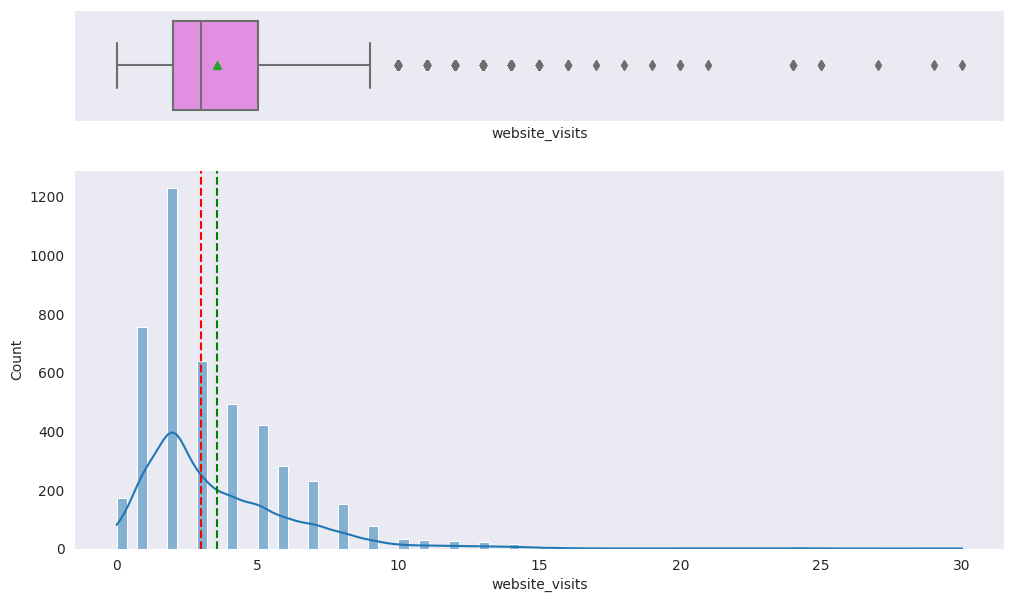

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.25, .85)}, figsize=(12, 7))
sns.set_style("dark")

# Adding a graph detail in each part
sns.boxplot(data=data, x="website_visits", ax=ax_box, showmeans=True, color='violet')
sns.histplot(data=data, x="website_visits", kde=True, ax=ax_hist)
ax_hist.axvline(data["website_visits"].mean(), color="green", linestyle="--")
ax_hist.axvline(data["website_visits"].median(), color="red", linestyle="--")
ax_box.set(xlabel='website_visits')
plt.show()

In [ ]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape[0]

174

###**$$Observation$$**
1. The distribution of website visits leans towards the right, suggesting a concentration of higher values.
2. A substantial majority of leads seem to be visiting the website between 1 to 5 times - a common pit stop.
3. A small group  (just 174 leads) chose to bypass the Extraalearn website entirely.
4. few outliers found at the upper bound of the box plot.
5. To uncover meaningful insights, a deeper analysis involving the interaction of this variable with others is crucial.
6. While this variable might not stand out on its own, it could reveal its true potential when combined with other variables, offering valuable insights into the bigger picture.

#### **3.time_spent_on_website**

  It Describes the amoun tof time a lead has spend on the website.
  The time spent on a website is a crucial factor in determining lead conversion into paying customers. Longer durations may indicate deeper engagement and interest. Analyzing this metric may help identify highly engaged leads.
  Analysing this variable may give us some insight about leads likings.

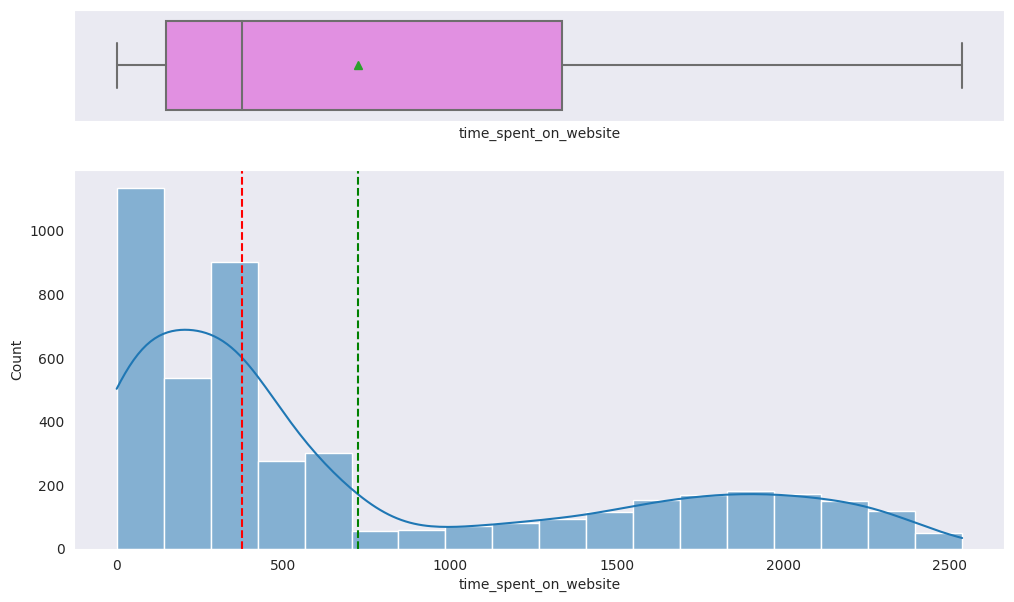

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.25, .85)}, figsize=(12, 7))
sns.set_style("dark")

# Add a graph in each part
sns.boxplot(data=data, x="time_spent_on_website", ax=ax_box, showmeans=True, color='violet')
sns.histplot(data=data, x="time_spent_on_website", kde=True, ax=ax_hist)
ax_hist.axvline(data["time_spent_on_website"].mean(), color="green", linestyle="--")
ax_hist.axvline(data["time_spent_on_website"].median(), color="red", linestyle="--")
ax_box.set(xlabel='time_spent_on_website')
plt.show()

####**$$Observation$$**
1. Time spent on website is right skewed, with mean being greater than median.
2. The hsitogram looks subtle bimodal, with two groups of leads, one which is spending less time on website an danother spending more time closer to 2000 minutes on the website.
3. in our further analysis we study these groups in details as in where our positve target lie more.

#### **4.page_views_per_visit**

This column describes the Average number of pages on the website viewed during the visit by the leads.

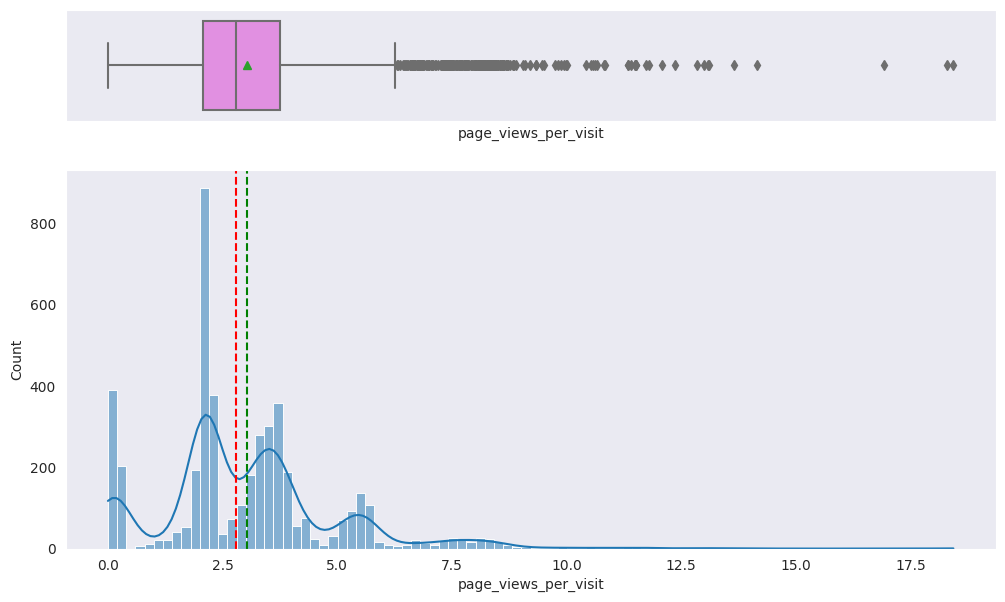

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios' :(.25,.85)}, figsize=(12,7) )
sns.set_style("white")
sns.boxplot(data=data, x="page_views_per_visit", color="violet", ax=ax_box, showmeans=True )
sns.histplot(data=data,x="page_views_per_visit", kde=True, ax=ax_hist)
ax_hist.axvline(data["page_views_per_visit"].mean(),linestyle="--",color="green")
ax_hist.axvline(data["page_views_per_visit"].median(),linestyle="--",color="red")
ax_box.set(xlabel="page_views_per_visit")
plt.show()

####**$$Observation$$**
1. Bar graph here is multimodal diving leads into various groups.
2. as seen from the boxplot, there are outliers on the upper whisker, who are viewing more than around 6 pages on the website.
3. mean is greater tham median with a slight skew towards the right.

#### **5.current_occupation**

This variable describes the occupation of the leads.Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program and become a paid customer.

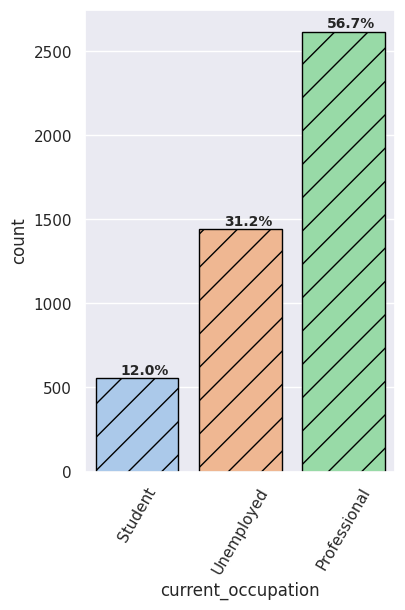

In [ ]:
plt.figure(figsize=(4,6))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="current_occupation",
            order = data["current_occupation"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

#### **$$Observation$$**

1. the count plot shows Professionals are the ne who are more interstested in Extraalearn courses and interacting most (56.7%) with them compared to other occupation groups, umemployed (31.2%) and student (12.0%).
2. we will analyse further how is the conversion rate for this group compared to other group.

#### **6.first_interactionn**

This variable describes how customer first ineracted with Extraalearn. Interaction channel can give some idea behind the leads conversion rate, which interaction channel is more convinient for leads.

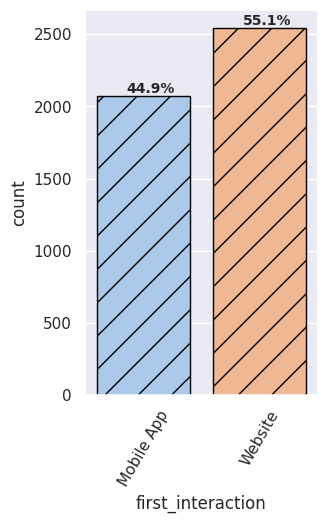

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="first_interaction",
            order = data["first_interaction"].value_counts().index[::-1],
              #hue = "status",
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**
1. most leads are choosing website as their first interaction means with extra learn.(55.1%)
2. This also is possibly hinting that since professional are the one's working most on computers and flockin more on extraalearn website.

####**7.profile_completed**
This variable describes how much of the profile was completed by the leads in percentage, Values include Low - (0-50%), Medium - (50-75%), High (75-100%). This can throw some light on how serious the lead is about the product higher % of profile completed could mean that customer is willing to buy extraalearn product and has high chances of getting converted into paid customers.

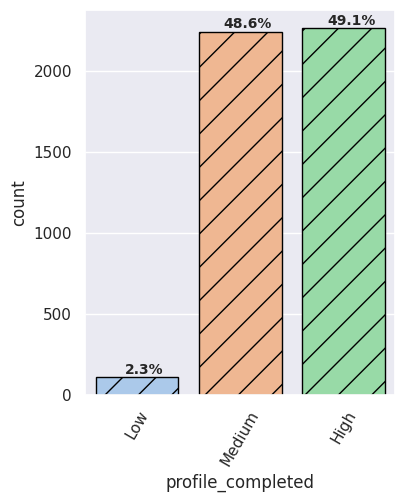

In [ ]:
plt.figure(figsize=(4,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="profile_completed",
            order = data["profile_completed"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**
1. from the count plot we can see that most people are completing their profile eitehr fully or half.
2. We will analyse this variable with target variable to understand leads of which group are converting more into paid customers.

####**8.last_activity**
This variable describes Last interaction between the lead and ExtraaLearn.

Email Activity: Seeking for details about the program through email,
Representative shared information with a lead like a brochure of program, etc

Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc

Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

This variable can also give us hint behind lead's Conversion rates. The channel with high counts could be the most convinient channel for interaction for leads.That channel should be optimised in a way that leads find all relevant information from there.

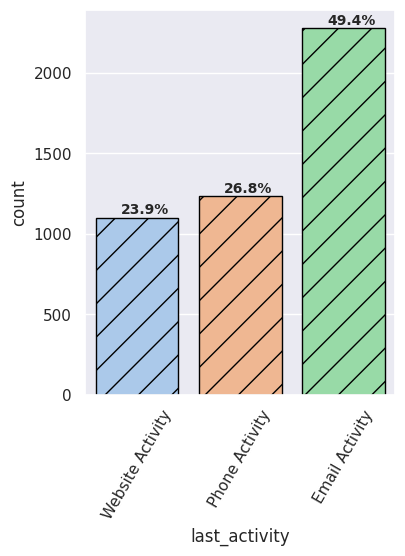

In [ ]:
plt.figure(figsize=(4,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="last_activity",
            order = data["last_activity"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**

1. Email activity is highest as the last activity of the leads.
2. will compare this variable with status to understand the satisfaction level of the leads.
3. will understnd the pattern how many percentage of leads are who are choosing email as last interaction activity are getting converted into paid customer.
4. high conversion would mean good satisfaction amongst lead, low conversion would mean bad satisfaction and hence not buying product.

####**9.print_media_type1**
Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

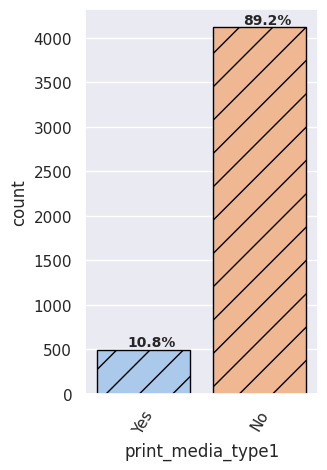

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="print_media_type1",
            order = data["print_media_type1"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**
1. very few leads are getting to know about extraalearn through print media type 1.
2. lets look at other advertising channels.

####**10.print_media_type2**
Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

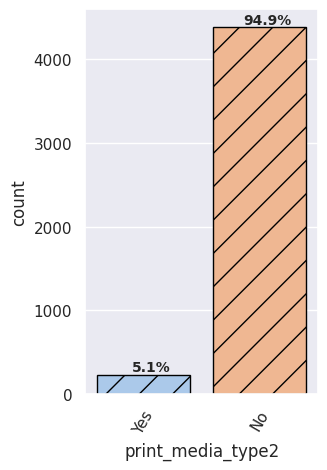

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="print_media_type2",
            order = data["print_media_type2"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**Observation:-**
1. Very few (5.1%) even fewer than print media type 1 are getting to know about extraalearn from print media type 2.

####**11.digital_media**
Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

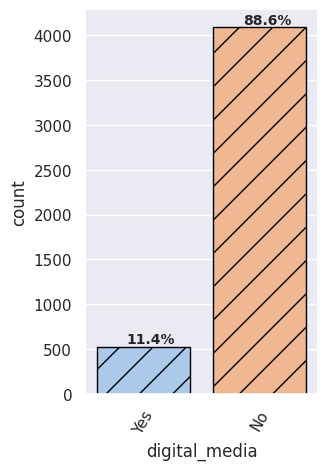

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="digital_media",
            order = data["digital_media"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**
1. Digital media also dosent seem to be playing huge role in bringing in the leads.


####**12.educational_channels**
Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

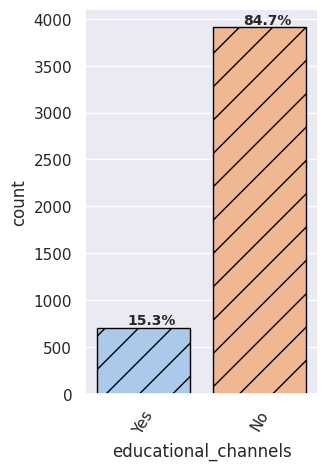

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="educational_channels",
            order = data["educational_channels"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

####**$$Observation$$**

1. Educational channels are also not showing good results in bringinf in the leads.
2. Apparately none of the advertising channels are showing good results, Extraalearn should work to improve their advertisments in order to bring more leads, which can then be nurtured and get converted into paid customers.

####**13.Referral**
Flag indicating whether the lead had heard about ExtraaLearn through reference.

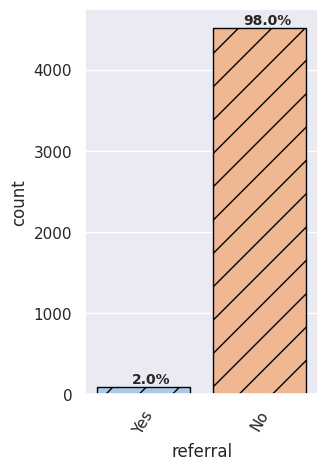

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="referral",
            order = data["referral"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

###**$$Observation$$**
1. very few leads are coming through some referral.
2. It would be intersting to see whetehr thses referaals are prooving to be fruitful for extraalearn.
3. If so then company should work on their Referral.

####**14.Status**
Thisis our target variable, it tells wheter lead got converted into paid customer or not.
1 = Converted into paid customer.
0 = Not converted into paid customer.



   status  count
0       0   3235
1       1   1377
********************


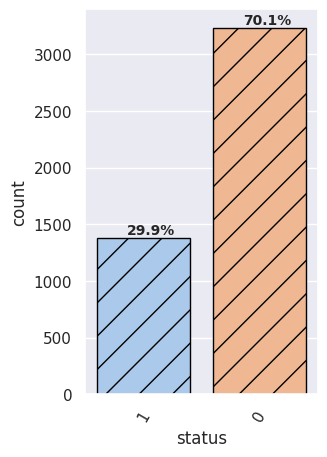

In [ ]:
print("\n")
print(data.groupby("status")["age"].count().reset_index(name="count"))#count of conversion and non conversion of the customers
print("*" * 20)
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
grp=sns.countplot(data=data, x="status",
            order = data["status"].value_counts().index[::-1],
              palette = "pastel",
              lw=1,
              ec="black",
              hatch= "/"
        )
plt.xticks(rotation = 60)
for p in grp.patches: ##Patches store the coordinates, width and height information about each bar of a countplot.
    label = "{:.1f}%".format(
        100 * p.get_height() / (data.shape[0])
          )  # percentage of each class of variable current_occupation

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    grp.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(5.5,5.5),
            weight = "bold",
            textcoords="offset points",
        )  # countplot with percentage on top
plt.show()

###**$$Observation$$**
1. Data is mostly about leads who did not get converted into paid customers.
2. data of this kind is known as imbalanced data.

**One intersting thing to check here is how many leads who are interacting with comapny are actually coming through ome advertisemnt channels.**

In [ ]:
filt = ((data["print_media_type1"]=="Yes") | (data["print_media_type2"]=="Yes") | (data["digital_media"]=="Yes") | (data["educational_channels"]=="Yes"))

In [ ]:
data.loc[filt, "status"].count()##count of leads coming through some advertisement channel.

1669

In [ ]:
print(len(data[filt]))

1669


In [ ]:
print(f"The number of leads coming through advertisement seen on any of the channels are {data.loc[filt].shape[0]} which is only {round((data.loc[filt].shape[0]/data.shape[0])*100,2)}% of the total leads.\nThat means {100-(round((data.loc[filt].shape[0]/data.shape[0])*100,2))}% are coming through some other channel.")

The number of leads coming through advertisement seen on any of the channels are 1669 which is only 36.19% of the total leads.
That means 63.81% are coming through some other channel.


###**$$Observation$$**
1. We see only 1669 of the leads are directed towards extraalearn by reading  advertisement on one of the channels,Probably Extraalearn should work more on their advertisinf compaigns to attract more leads.
2. Lets analyse of these 1669 how many really get converted into paid customer

In [ ]:
data[filt].groupby("status")["age"].count().reset_index(name = "count")

,status,count
0,0,1166
1,1,503


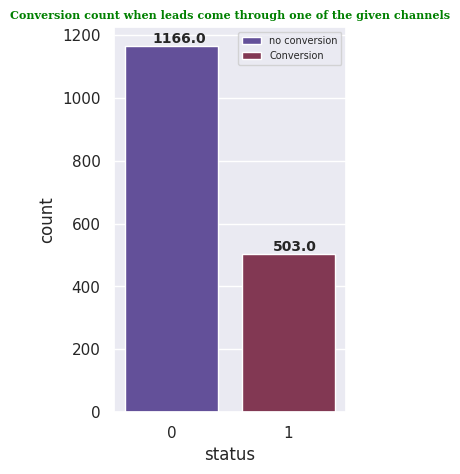

In [ ]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.set_theme("paper")
sns.set_context("notebook")
fontstyle = { "family" : "Serif" , "size" : 8, "color" : "green" , "weight" : "bold"} #creatining a font dictionary to chnage the fonts.
plot = sns.countplot(data=data[filt], x="status", palette="twilight",label=["no conversion","Conversion"])
plot.set_title("Conversion count when leads come through one of the given channels", fontdict=fontstyle)
for p in plot.patches:
  #print(p)
  label = p.get_height()
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  plot.annotate(
      label,
      (x,y),
      ha = "center",
      va = "center",
      size=10,
      xytext=(5,5),
      weight = "bold",
      textcoords="offset points",
    )
  plt.legend(fontsize=7)

##**$$Observation$$**
1. 503 out of 1166 leads who are directed towards extraalearn through some advertising media are getting converted into paid customers which is almost 50%.
2.Maybe extraalearn should up their advertising game to attract more leads.

## **Bivariate analysis**

#### Let's explore 2 and more variables against each other to undestand the pattern in data in depth.

###**1.Correlation Matrix**
This matrix will help to undestand how 2 variables are correlated, direction of correlation and magnitude of correlation

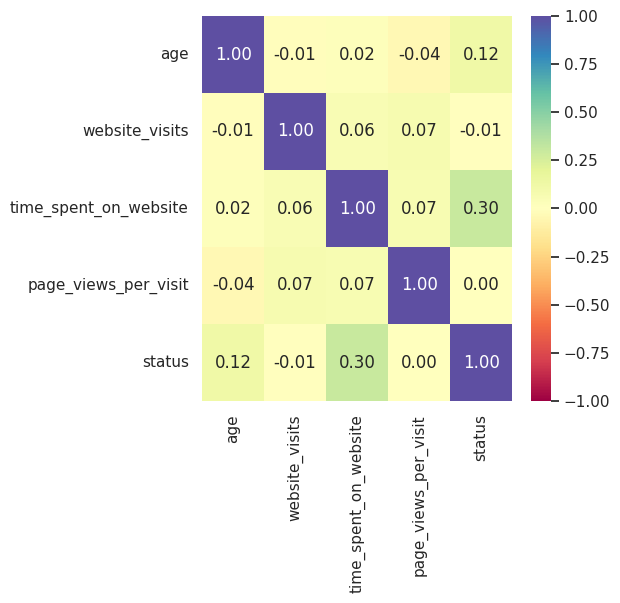

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")#heatmap to generate the correlation matrix
plt.xticks(rotation = 90)
plt.show()

####$$**Observation**$$

*   No 2 independent variable shows high corrleation with each other.
*   Target variable **status** is very slightly positively correlated with **age** and **time spent on website**.



####**2.Age analysis against Status**

We're set to delve into the analysis of the Age variable in relation to the Status. Our goal is to uncover potential patterns in the age distribution of leads and identify the age groups that exhibit a higher level of attraction towards our product. Let's unlock insights from the data!

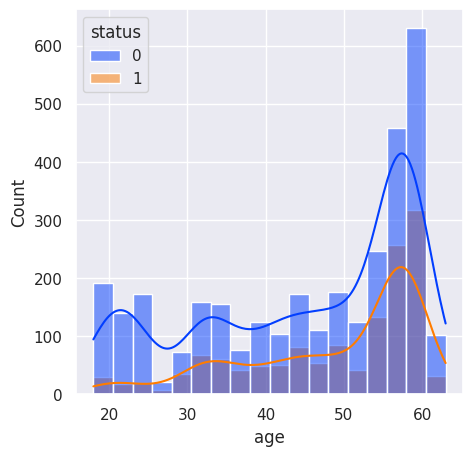

Text(0.5, 1.0, 'Box of status against age')

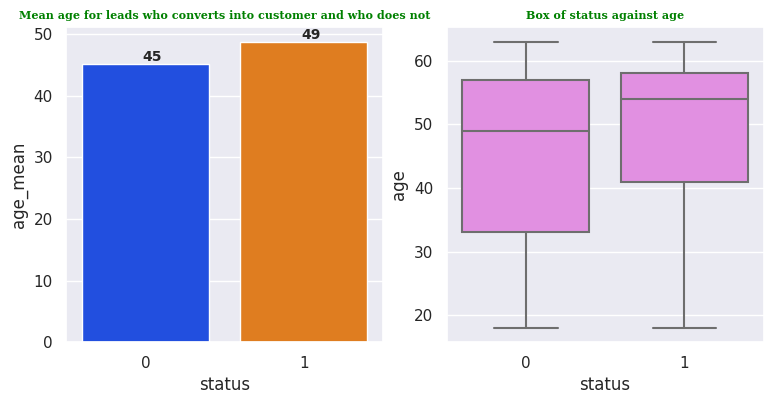

In [ ]:
#Countplot
#Ccountplot of age in both the status groups(0,1).
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.histplot(
        data=data,
        x= "age",
        kde=True,
        color="orange",
        stat="count",
        hue = "status",
        palette="bright"
    )
plt.show()#Command to plot a histplot for status against age.

#Barplot
#Command to plot a barplot for status againt its mean age.
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
a =data.groupby(["status"])["age"].mean().reset_index(name="age_mean")
#print(a)
fontstyle = { "family" : "Serif" , "size" : 8, "color" : "green" , "weight" : "bold"} #creatining a font dictionary to chnage the fonts.
plot=sns.barplot(data = a, y= "age_mean" ,x = "status",  palette = "bright")
plot.set_title("Mean age for leads who converts into customer and who does not", fontdict=fontstyle)
for p in plot.patches:
  x = p.get_x() + p.get_width() / 2  # width of the plot
  y = p.get_height()  # height of the plot
  label = round(p.get_height())
  plot.annotate(label,
                  (x,y),
                  ha="center",
                  va="center",
                  size = 10,
                  xytext=(5,5),
                  weight = "bold",
                  textcoords="offset points")

#Boxplot
#Command to plot a boxplot for status against age.
plt.subplot(2,2,2)
fontstyle = { "family" : "Serif" , "size" : 8, "color" : "green" , "weight" : "bold"} #creatining a font dictionary to chnage the fonts.
box_plot = sns.boxplot(x = "status", y = "age", data = data, color='violet')# Code to create the boxplot of cuisine type vs cost of the order.
box_plot.set_title("Box of status against age", fontdict=fontstyle)


####$$**Observation**$$



1.   From the count plot, we can infer that number of leads which interact with extra learn are maximum between age 50 and 60 years which is consistent with boxplot findings also.
2.   Leads between this age range are also maximum for both leads with status status 1 and 0, which implies that this age group people want to do courses the most, so team at extra learn should nurture leads in this age group.
3.  We also saw that mean age is smaller than median age for both the status groups, meaning data is left skewed in both the groups which implies, there is large spread of data towards the smaller age group for both the status groups.
4. These findings can tell that extralearn quality of courses are more tailor made for people in bigger age groups, Leads in smaller age also interact with extra Learn but do not become their paid customer could be because the courses offered are not what they are looking for





###**3.Current occupation Vs. Status**

Leads interacting with Extraalearn may hold varying course expectations based on their current occupations. To uncover potential connections, we'll examine these two variables collectively, aiming to identify any underlying patterns. Lets plunge into this analysis to reveal valuable insights.

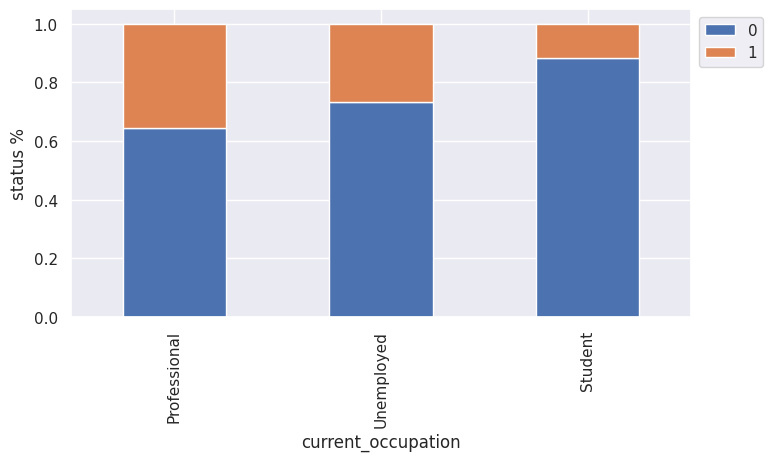

In [ ]:
occu=(pd.crosstab(data['current_occupation'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)
plt.show()

####$$**Observation**$$
1.   High Conversion of almost 40% and 30% into paid customers are seen within Professionals and unemployed ocupationan category respectively.
2.  Conversion rate amongst students is very less (~10%) when compared to other classes of occupation.
3. This hints that the courses available are notably more alligned with industry demands and geared towards professional applications, emphasizing the enhancement of skills within specific domains or areas of expertise.



###**4.Current occupation Vs. Status Vs. age**
Having sifted through the age versus  status and current occupation versus  status data, intriguing patterns emerge. Now, an analytical quest beckons: Does the confluence of age and occupation hold sway over  status? By harmonizing these variables, we endeavor to unearth the underlying determinants steering categorization.

In [ ]:
data.groupby(["current_occupation","status"])["age"].describe().sort_values(by= ["current_occupation","status"], ascending=True)

count     mean      std      min      25%  \
current_occupation status                                                  
Professional       0      1687.00000 49.04386 10.03744 25.00000 42.00000   
                   1       929.00000 49.89882  9.59944 25.00000 43.00000   
Student            0       490.00000 21.17347  1.99399 18.00000 19.00000   
                   1        65.00000 20.92308  2.05630 18.00000 19.00000   
Unemployed         0      1058.00000 50.05482 10.05175 32.00000 42.00000   
                   1       383.00000 50.37598  9.86292 32.00000 43.00000   

                               50%      75%      max  
current_occupation status                             
Professional       0      54.00000 57.00000 60.00000  
                   1      55.00000 57.00000 60.00000  
Student            0      21.00000 23.00000 25.00000  
                   1      21.00000 23.00000 24.00000  
Unemployed         0      54.00000 58.00000 63.00000  
                   1      55.00000 58.00000 63.00000

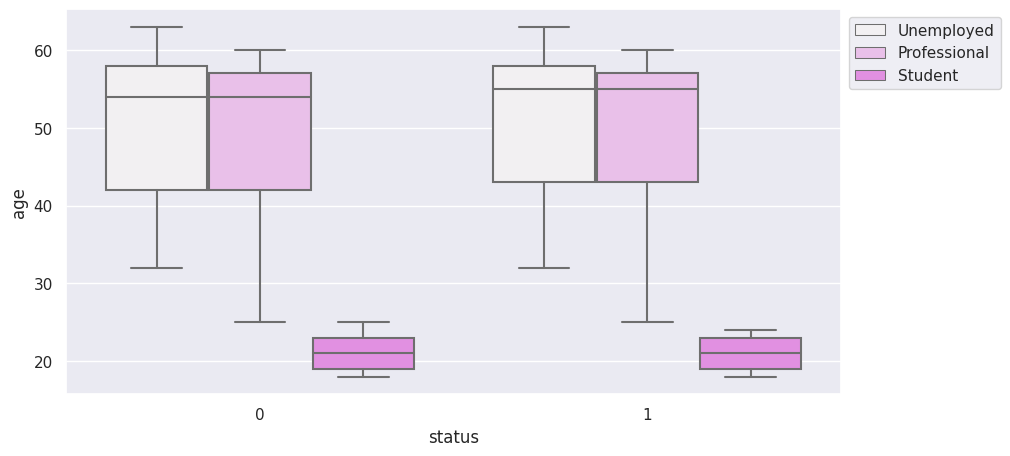

In [ ]:
plt.figure(figsize=(10, 5))
box_plot = sns.boxplot(x = "status", y = "age", data = data,color="violet",hue="current_occupation")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)
plt.show()

####$$**Observation**$$

A very good insightful demarcations derived from application of
groupby and the boxplot visualizations. Here's a succinct representation of our findings:
1.   A remarkable trend unfolds as we inspect the groupby table. The Professional category boasts the highest volume of leads engaging with Extraslean. Evidently, the courses offered serve as a catalyst for career advancement within this cohort.
2.   Observing Quartile 2 and Quartile 3 of the boxplot for professionals interacting with Extraslean, we discern a peak of leads within the 54 to 57 age range. This age segment distinctly resonates with the highest interactions.
3. Despite a seemingly akin distribution of age among professionals purchasing courses versus those abstaining, an underlying factor appears to be at play, intriguingly shaping this outcome.
4. In a contrasting vein, the student category contributes the fewest leads. It appears that the course offerings are not optimally tailored to their preferences, elucidating the minimal engagement within this group.

We're diving deeper into the data to figure out the hidden reasons behind these interesting findings. We will now navigate through the data's details, aiming to discover more about what's causing these patterns.










####**5.First interaction Vs. Status**

Crafting a compelling and persuasive initial interaction with leads is of paramount importance for the company. Our attention zeroes in on the channels utilized for this inaugural engagement and their potential impact on lead conversion. Now,lets gear up to uncover the insights hidden beneath the layers of information.

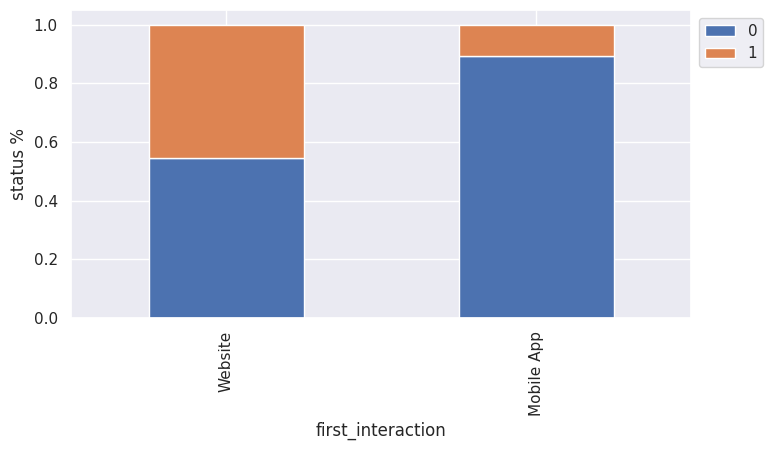

status,0,1,All
first_interaction,,,
Mobile App,1852,218,2070
Website,1383,1159,2542
All,3235,1377,4612


In [ ]:
occu=(pd.crosstab(data['first_interaction'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['first_interaction'],data['status'],margins=True)#code to visualise Crosstab table with parameters of interest

####$$**Observation**$$

Absolutely, the insights revealed are quite intriguing:
1.  The lead influx through websites surpasses that of mobile, albeit the difference in percentages remains marginal.
2. Among the 2542 leads originating from the website, an impressive 46% - equivalent to 1159 leads - transitioned into paid customers.
3. The mobile-first interaction doesn't showcase robust conversion numbers. Only 10% of leads selecting this channel convert into paid customers.
4. It appears that the allure and persuasiveness of mobile app interactions might be lagging, warranting further attention.
5. An important factor to consider is our earlier observation: most paid customers hail from higher age groups. Given the potential challenges posed by diminished visual acuity and the smaller screens of phones, the allure of courses through this channel might be dampened.

The puzzle pieces are fitting together, and it's like a data treasure hunt! Websites are rocking the lead game, with mobile not far behind. But wait, there's a plot twist: the website-first crowd is turning into paying customers at a cool 46% rate, while mobile is having a bit of a conversion snooze at 10%. Maybe those mobile app vibes need a touch of excitement? Also, remember our more mature audience - smaller phone screens might not suit their comfort.













####**6.Profile Completed Vs Status**

Profile completion percentage - the measure of how much the lead's profile on the website or mobile app is filled. It's like a progress bar on a video game, but for potential customers. Why does this matter? Well, high completion rates could be our jackpot! These folks are serious about the course and might just be waving their 'paying customer' flag.
So, equipped with data, let's uncover the captivating patterns beneath it all.

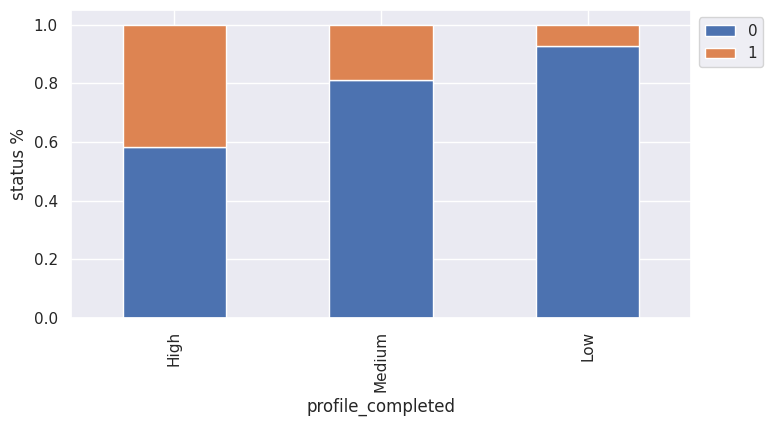

status,0,1,All
profile_completed,,,
All,3235,1377,4612
High,1318,946,2264
Medium,1818,423,2241
Low,99,8,107


In [ ]:
occu=(pd.crosstab(data['profile_completed'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['profile_completed'],data['status'],margins=True).sort_values(by = "All", ascending=False)#code to visualise Crosstab table with parameters of interest

####$$**Observation**$$

As anticipated, the profile completion factor indeed uncovers noteworthy trends:
1.   While the counts of leads falling into the high and medium profile completion ranges are nearly equivalent, what truly stands out is the conversion rate for the high profile completion group, surpassing an impressive 40%. Quite remarkable!
2.   Evidently, the high-profile completion leads exhibit a higher level of seriousness and eagerness.
3. It's clear that these leads warrant heightened attention from the Extraalearn team for nurturing, potentially boosting their conversion rates even further.
4. On the other hand, leads in the low profile completion category seemed to be simply exploring the app, perhaps passing the time. Nevertheless, they've contributed to the audience count and could potentially spread the word among their peers in the future about the courses present on the platform of Extraalearn.


These findings provide valuable insights for refining strategies and optimizing engagement with each profile completion category.



####**6.Website_visits Vs Status**

Let's investigate the connection between lead website visits and customer conversion. It's a bit like deciphering a secret code - we're exploring if more website visits translate to a higher likelihood of leads becoming valued customers. Get ready to uncover the insights hidden within the data!

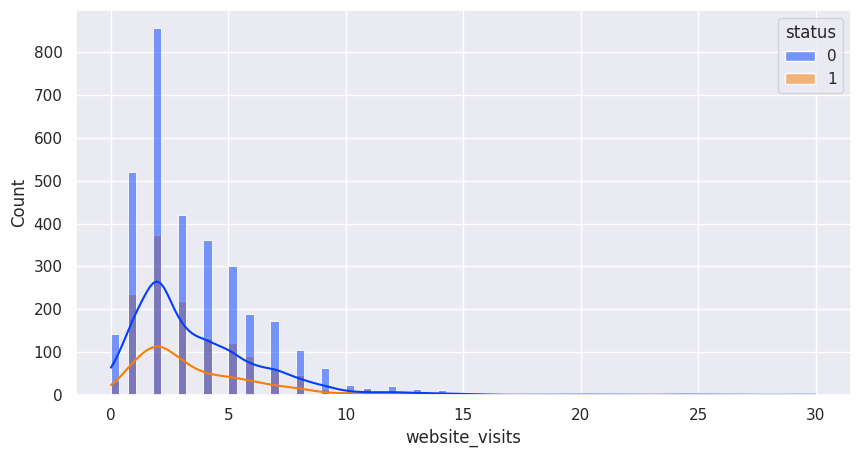

<function matplotlib.pyplot.show(close=None, block=None)>

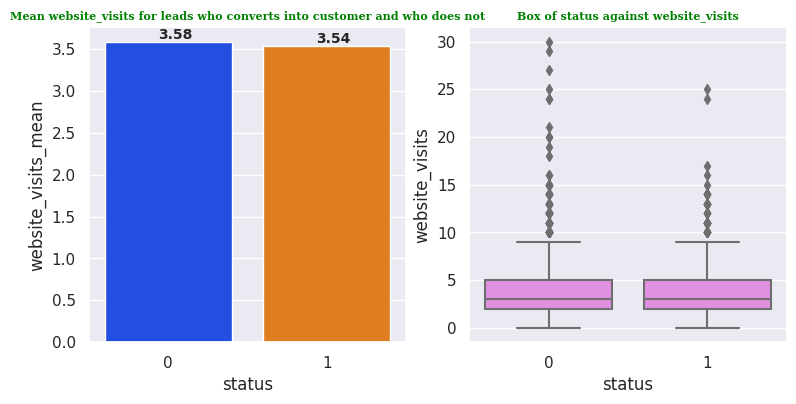

In [ ]:
#Countplot
#Countplot of Website_visits in both the status groups(0,1).
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(
        data=data,
        x= "website_visits",
        kde=True,
        color="orange",
        stat="count",
        hue = "status",
        palette="bright",
    )
plt.show()#Command to plot a histplot for status against website_visits.

#Barplot
#Command to plot a barplot for status againt its mean website_visits.
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
a =data.groupby(["status"])["website_visits"].mean().reset_index(name="website_visits_mean")
#print(a)
fontstyle = { "family" : "Serif" , "size" : 8, "color" : "green" , "weight" : "bold"} #creatining a font dictionary to chnage the fonts.
plot=sns.barplot(data = a, y= "website_visits_mean" ,x = "status",  palette = "bright")
plot.set_title("Mean website_visits for leads who converts into customer and who does not", fontdict=fontstyle)
for p in plot.patches:
  x = p.get_x() + p.get_width() / 2  # width of the plot
  y = p.get_height()  # height of the plot
  label = round(p.get_height(),2)
  plot.annotate(label,
                  (x,y),
                  ha="center",
                  va="center",
                  size = 10,
                  xytext=(5,5),
                  weight = "bold",
                  textcoords="offset points")

#Boxplot
#Command to plot a boxplot for status against website_visits.
plt.subplot(2,2,2)
fontstyle = { "family" : "Serif" , "size" : 8, "color" : "green" , "weight" : "bold"} #creatining a font dictionary to chnage the fonts.
box_plot = sns.boxplot(x = "status", y = "website_visits", data = data, color='violet')# Code to create the boxplot of cuisine type vs cost of the order.
box_plot.set_title("Box of status against website_visits", fontdict=fontstyle)
plt.show

###$$**Observation**$$

Ok so number of website visit dosent tell much about lead conversion rate.
1.   Our histogram turned out to be a bit of a mystery novel - no big patterns revealed between website visits and lead conversion rates. It's like the histogram is whispering, "I've got my secrets."
2.   Statistical Parity: The mean and median for both converted and non-converted leads are nearly indistinguishable. It's as if the data is striving for equilibrium, making it challenging to discern which group holds the conversion key.
3. The Website_visits impact on determining the target audience appears ambiguous. We're faced with the possibility that it might not be as empirical as we initially thought in identifying the right audience.
4. It's quite common for users to click on pop-ups that lead to uninteresting websites. And here's the twist: if these pop-ups persist, users might resort to blocking the website altogether. Extraalearn's website could potentially find itself in this scenario. However, here's the data angle: while the website visit count might rise, the customer count might not follow suit. In essence, it's like hosting a big gathering, but only a handful of guests are truly engaged.


####**7.time_spent_on_website vs status**
This variable depicts how much time each lead spaends on the website.


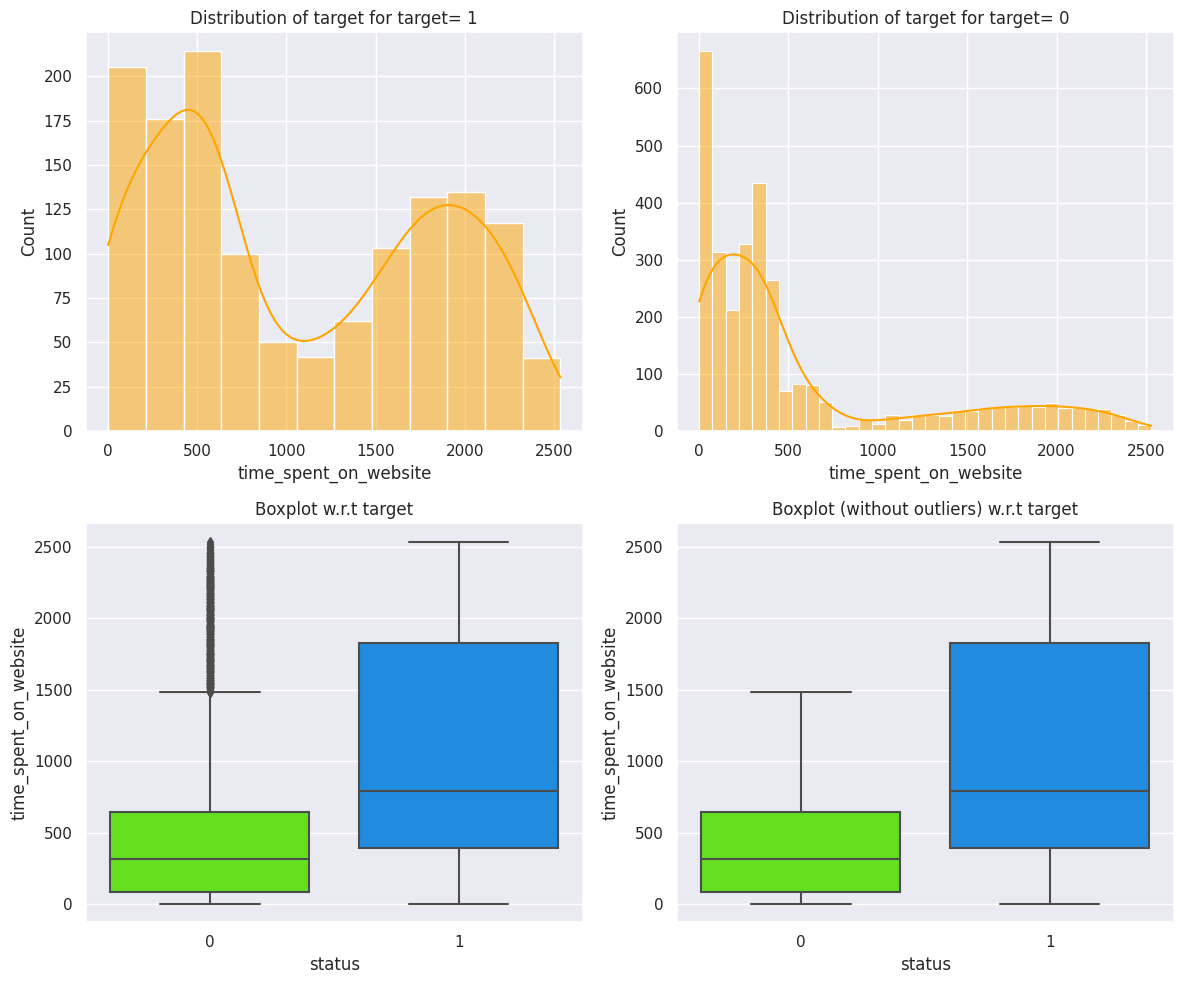

,status,median
0,0,317.00000
1,1,789.00000


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].set_title(f"Distribution of target for target= 1")
sns.histplot(
        data=data[data["status"] == 1],
        x="time_spent_on_website",
        kde=True,
        ax=axs[0, 0],
        color="orange",
        stat="count",
    )

axs[0, 1].set_title("Distribution of target for target= 0")
sns.histplot(
        data=data[data["status"] == 0],
        x="time_spent_on_website",
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="count",
    )

axs[1, 0].set_title("Boxplot w.r.t target")
sns.boxplot(data=data, x="status", y="time_spent_on_website", ax=axs[1, 0], palette="gist_rainbow")

axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
sns.boxplot(
    data=data,
    x="status",
    y="time_spent_on_website",
    ax=axs[1, 1],
    showfliers=False,
     palette="gist_rainbow",
    )

plt.tight_layout()
plt.show()

data.groupby(["status"])["time_spent_on_website"].median().reset_index(name="median").sort_values(by = "status")

###**$$Observations$$**
1. Elegant patterns emerge from our analysis, offering valuable insights.
2. Both the histogram and box plot eloquently convey a compelling narrative: individuals dedicating more time on the website exhibit a higher propensity to transition into paid customers..
3. The histogram portraying positive outcomes unveils a bimodal distribution, hinting at two distinct lead groups. One cluster showcases minimal time engagement, while the other group dedicates significant moments to the website. Remarkably, those investing over 1500 minutes in website interaction showcase notably elevated prospects of converting to paid customers.
5. The box plot complements this narrative, reflecting a pronounced difference in median time spent on the website between future customers and non-customers. These data-driven findings underscore the tangible impact of website engagement on subsequent customer conversion, providing valuable insights for strategic decision-making.
6. The outliers are not affecting the median value.

####**7.page_views_per_visit vs status**

This vaiable tells the Average number of pages on the website viewed during the visits.

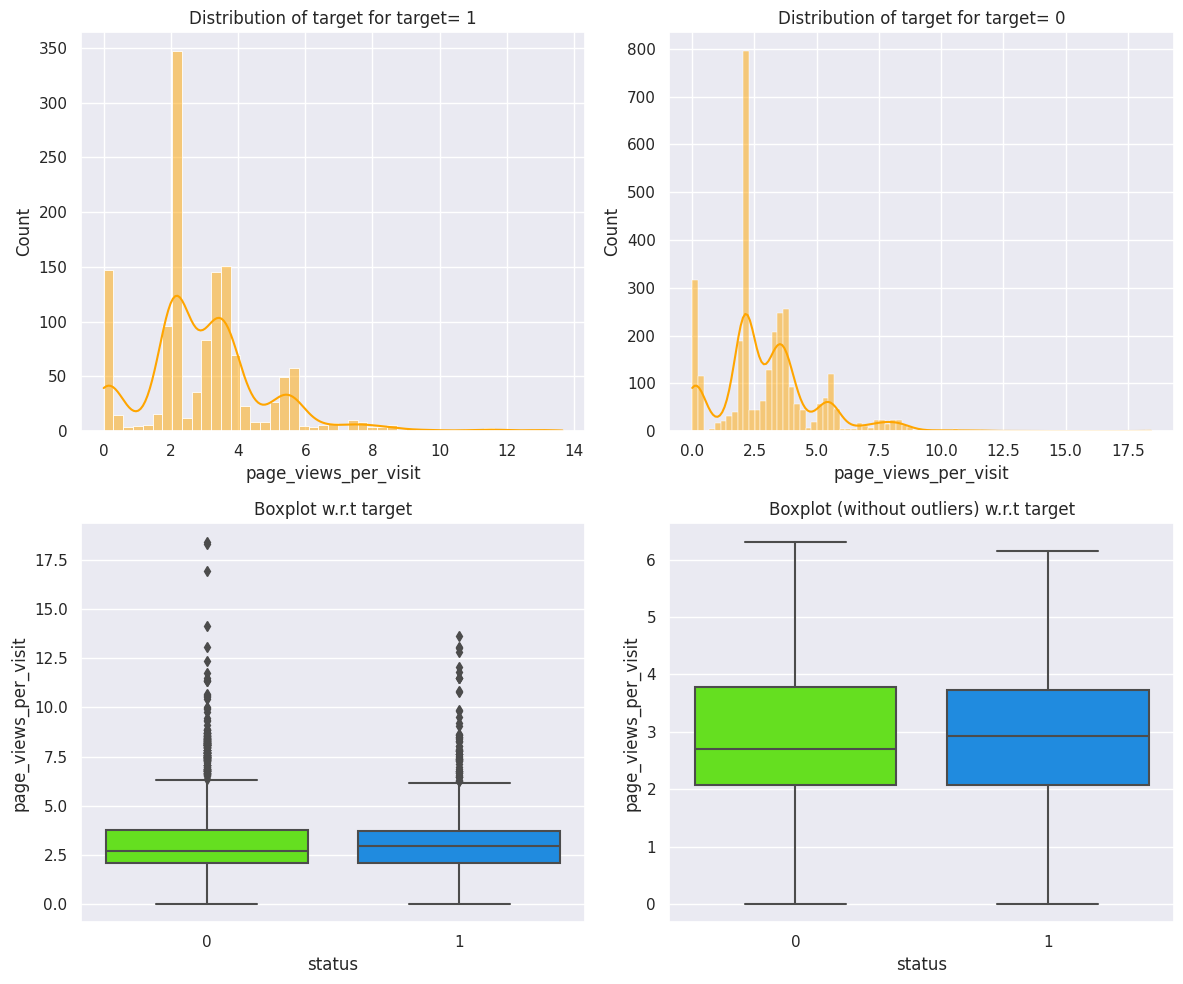

,status,median
0,0,2.70600
1,1,2.93500


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].set_title(f"Distribution of target for target= 1")
sns.histplot(
        data=data[data["status"] == 1],
        x="page_views_per_visit",
        kde=True,
        ax=axs[0, 0],
        color="orange",
        stat="count",
    )

axs[0, 1].set_title("Distribution of target for target= 0")
sns.histplot(
        data=data[data["status"] == 0],
        x="page_views_per_visit",
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="count",
    )

axs[1, 0].set_title("Boxplot w.r.t target")
sns.boxplot(data=data, x="status", y="page_views_per_visit", ax=axs[1, 0], palette="gist_rainbow")

axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
sns.boxplot(
    data=data,
    x="status",
    y="page_views_per_visit",
    ax=axs[1, 1],
    showfliers=False,
     palette="gist_rainbow",
    )

plt.tight_layout()
plt.show()

data.groupby(["status"])["page_views_per_visit"].median().reset_index(name="median").sort_values(by = "status")

####**$$Observation$$**

The median number of pages viewed per visit is quite similar for both classes 1 and 0.
1. To better analyze this variable, we could use more detailed information about the specific pages visited, like course content, fees, founder details, or job opportunities at Extraalearn.
2. Leads checking out pages related to course details, duration, and fees appear more likely to convert into paid customers. With a little extra attention, Extraalearn could potentially seal the deal with these leads.
3. Conversely, leads exploring pages about the company's founder or job opportunities might not be the ideal target for course purchases.
4. Relying solely on the number of pages viewed doesn't provide substantial insights into the target data; additional context is crucial for a deeper analysis.

####**7. Last_activity vs status**

 Last interaction between the lead and ExtraaLearn.

**Email Activity:** Seeking for details about program through email, Representative shared information with lead like brochure of program , etc

**Phone Activity:** Had a Phone Conversation with representative, Had conversation over SMS with representative, etc

**Website Activity:** Interacted on live chat with representative, Updated profile on website, etc

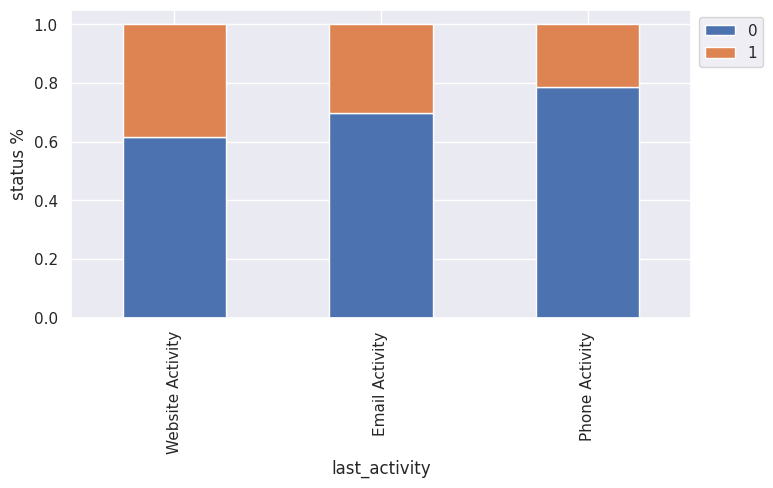

status,0,1,All
last_activity,,,
All,3235,1377,4612
Email Activity,1587,691,2278
Website Activity,677,423,1100
Phone Activity,971,263,1234


In [ ]:
occu=(pd.crosstab(data['last_activity'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['last_activity'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

###**$$Observation$$**

1. A notable finding emerges when examining the last interaction variable – leads that engage through websites as last interaction tend to exhibit a higher likelihood of satisfaction. This trend aligns with a substantial increase in the conversion rate, showcasing the pivotal role of the website interaction in driving successful outcomes.
2. A pertinent observation arises when dissecting email activity – despite its prominence as the most frequent mode of interaction, the conversion rate stands at a modest 30%. One plausible explanation could involve delayed responses or insufficiently clear responses to lead inquiries. This emphasizes the need for meticulously crafted email replies to capture lead interest and secure conversions effectively.
3. The intricacies of phone activity reveal a rather perplexing scenario. Despite registering as one of the most prevalent form of interaction, the associated conversion rate falls below expectations. Unraveling this enigma necessitates a deeper dive into the nature of phone activity. Whether it's due to inadequacies in customer representative responses or technological limitations affecting the quality of interactions, gathering additional data is imperative to ascertain the driving factors behind this phenomenon.




##**7. Annalysing all the advertising media against status.**
####**a. print_media_type1 vs status**

Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

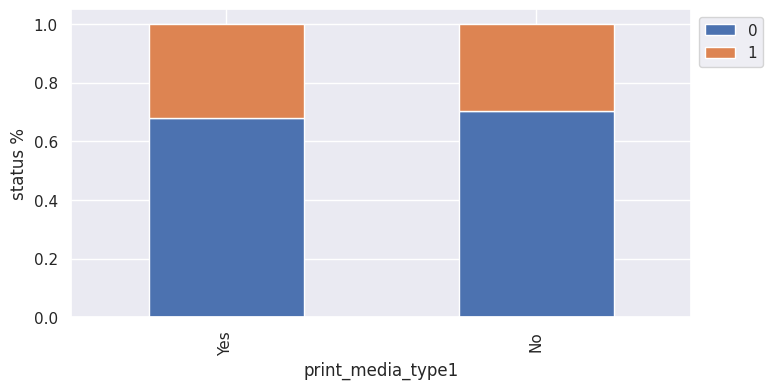

status,0,1,All
print_media_type1,,,
All,3235,1377,4612
No,2897,1218,4115
Yes,338,159,497


In [ ]:
occu=(pd.crosstab(data['print_media_type1'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['print_media_type1'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

####**b. print_media_type2 vs status**
Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

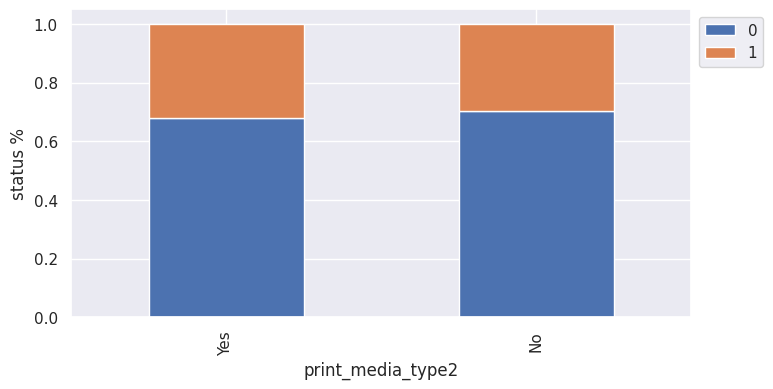

status,0,1,All
print_media_type2,,,
All,3235,1377,4612
No,3077,1302,4379
Yes,158,75,233


In [ ]:
occu=(pd.crosstab(data['print_media_type2'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['print_media_type2'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

####**c. digital_media vs status**

Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

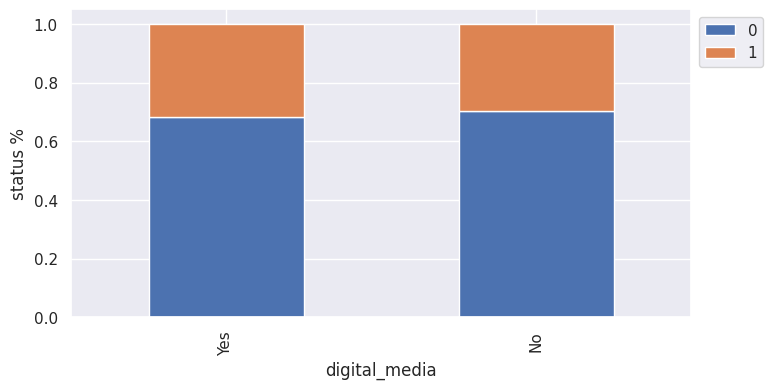

status,0,1,All
digital_media,,,
All,3235,1377,4612
No,2876,1209,4085
Yes,359,168,527


In [ ]:
occu=(pd.crosstab(data['digital_media'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['digital_media'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

####**d. educational_channel vs status**

 Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

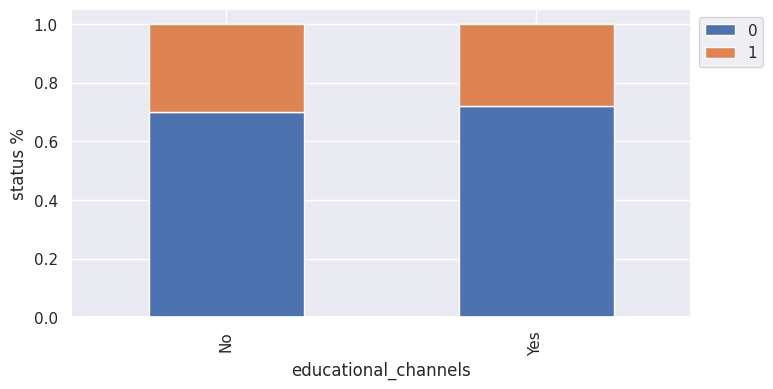

status,0,1,All
educational_channels,,,
All,3235,1377,4612
No,2727,1180,3907
Yes,508,197,705


In [ ]:
occu=(pd.crosstab(data['educational_channels'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['educational_channels'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

###**$$Observation$$**
1. Of all the advertisinf channel, Educational channel is attracting  the maximum number leads, which is also showing a good conversion rate 27%.
2. of all the 705 leads came to know about Extraalearn, 197 are converting into paid customer.
3. One intersting thing to observe here is that Print median type 1 (newspaper)is showing best result (31%) when it is about converting leads to paid customers, Probably because as seen before old people still love to read papers and who also are the leading group with respect to age who are buying products.
4. hence Extraalearn should do some work in direction of increasing its advertisinf frequency in new papers, in order to draw more leads.

####**11. referral vs status**

Flag indicating whether the lead had heard about ExtraaLearn through reference.

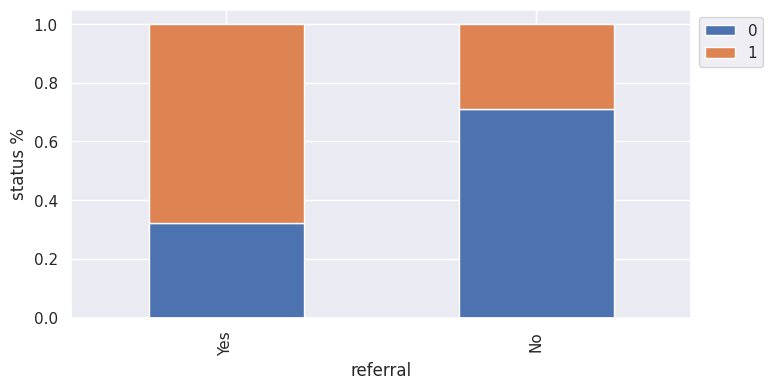

status,0,1,All
referral,,,
All,3235,1377,4612
No,3205,1314,4519
Yes,30,63,93


In [ ]:
occu=(pd.crosstab(data['referral'],data['status'],normalize='index')).sort_values(by= 1, ascending=False)
occu.plot(kind='bar',figsize=(8,4),stacked=True)#Code to build the stacked barplot using dataframe obtained from crosstab
plt.ylabel('status %')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1),frameon=True)#code to place the legend startigically on the plot to give better visual.
plt.show()
pd.crosstab(data['referral'],data['status'],margins=True).sort_values(by = 1, ascending=False)#code to visualise Crosstab table with parameters of interest

###**$$Observation$$**

Good revelation here as weel.
1. 67% of leads who are coming through some referral get converted into paid customer.
2. Good Word of mouth is best advertisinf and extraa learn should give benefits to their previus students or employee who refer extraalearn amongst their peer.
3. Should study more data with positive referrals to understand its driving capacity of target variable.



## **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### **Missing value imputation**


1.   Well, it seems luck is on our side this time! The given data is playing nice and doesn't have any missing values. No need to embark on a missing value treatment adventure.
2.   our data is complete and ready for model building.. Here's to smooth sailing through this analysis with a full set of data!


###**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (Q1 - 1.5 * IQR)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

age                     0.00000
website_visits          3.33912
time_spent_on_website   0.00000
page_views_per_visit    5.57242
status                  0.00000
dtype: float64

$$**Observation**$$

1.   Absolutely, identifying and handling outliers is a critical aspect of data analysis. In this context, it's worth noting that only the integer variables "Website_visits" and "Page_views_per_visit" exhibit outliers.
2.   However, the decision on how to deal with these outliers can vary depending on the analytical approach. In this case, the choice has been made not to remove or treat the outliers. The rationale behind this decision is grounded in the belief that real-world scenarios often involve outliers for variables like "Website_visits" and "Page_views_per_visit." These outliers may contain valuable information about leads that ultimately convert into paid customers. Therefore, retaining these outliers can enable the model to capture and learn the underlying patterns associated with such customers, potentially enhancing the model's predictive capability.


##**Preparing data for modeling**##
1.   Creating dummy variables for categorical Variables
2.   Separating the independent variables (X) and the dependent variable (Y)
3.   Splitting the data into 70% train and 30% test set
4.   selection a model evaluation criteria.
5.   Model building.



###**1. Creating dummy variables for categorical Variables**###

Time to unravel the categorical variables! To make them play nice with our analytical tools, we'll create dummy variables. These dummies act like digital stand-ins for the categorical data, ensuring they're ready for action in our analysis. Each category gets its own dummy variable, which takes the values of 0 or 1, indicating presence or absence.

With this transformation, we're unleashing the categorical power in a language that our models understand. So, let's code away and get those dummies dancing to the data tune!

In [ ]:
data.shape

(4612, 14)

In [ ]:
df = pd.get_dummies(data, drop_first=True)
df.shape

(4612, 17)

In [ ]:
for i in [df.columns,data.columns]:
  print(f"{i}\n")

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')



###2. **Separating the independent variables (X) and the dependent variable (Y)**

**Why do we do separation of target variable from independent variable?**

when we're building models to predict something, like whether a customer will buy a product or not, we want the model to learn on its own. We don't want to give it the answer (the target) before the test. If we mix up the answer with the other information, the model might just memorize the answers instead of truly understanding the patterns.

So, we keep the target (answer) separate from the other information while teaching the model. This way, it learns to recognize the patterns in the data and makes predictions based on what it learned, not what we told it. This separation makes our model smarter and better at predicting real-life situations


In [ ]:
x = df.drop(["status"], axis=1)#new dataframe without status column.
y = df["status"]
x.head()#to check there is no status column in the dataset

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.32000,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.07400,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.05700,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.91400,1,0,1,0,0,0,0,0,0,0,0,0


###**3. Splitting the data into 70% train and 30% test set with stratified sampling**

Dividing data into a 70:30 ratio strikes a balance between training (70%) and testing (30%) the model. This split ensures the model learns from a substantial dataset while validating its performance on new, unseen data. It prevents overfitting and provides statistically meaningful results for model evaluation.

In certain classification scenarios, we might encounter a significant imbalance between the target classes. For instance, there could be a situation where negative samples outnumber positive samples by a considerable margin. In these cases, employing the stratified sampling technique is advised. This technique ensures that the proportional representation of each class remains consistent across both the training and validation datasets.

In [ ]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
a=x_train.shape[0]
print(f"number of rown in train data \n{a}")
print("\nnumber of rows in test data")
x_test.shape[0]#check number of rows in test data

number of rown in train data 
3228

number of rows in test data


1384

###**4. Selection a model evaluation criteria.**

####**Model evaluation criterion**

1.	We want to predict whether a lead is likely to convert into a paid customer or not.
2.	This model can make wrong predictions as shown below.
Please note that “1” class of the “Status” variable is considered as the positive class.

**•	False Negatives** : It predicts that a lead is not likely to get converted into a Paid customer but actually lead is likely to get converted into a paid customer.
*Impact*: Loss of customer – more nurturing could have been done for these leads to get them converted into a paid customer. Loss of revenue, Monetary loss.

**•	False Positive** : It Predicts that a lead is likely to get converted into a paid customer but in realty lead is less likely to get converted into a paid customer.
*Impact*: Loss of time Resources, waste of human efforts.


####**Which case is more important?**
3.	To be able to gain paid customers and optimise resource allocation, we would want the model to reduce its False negatives as  incorrectly identified leads with high chances of buying the product, will negatively affect customer conversion rate which in turn will result in monetary loss to the company.

4.	In the given case it is very important that all the leads with high possibility of conversion are not missed out from being nurtured by the company so that they don’t go without buying. Also making a call and nurturing a lead is less costly than losing a customer. We don’t care much about precision here but recall.
5.	So we would want Recall(sensitivity) to be high, Higher the recall lower will be the false negatives.

##$$Recall = TP/(TP+FN)$$
Lower the FN higher will be the Recall.

###*Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.*


In [ ]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

###**4. Building the model**
We will be building 2 different models:


*   Decision Tree
*   Random Forest



##*1. Decision Tree*

A decision tree model is a fundamental concept in machine learning and data analysis. It resembles a flowchart that navigates decisions by branching into paths based on data attributes. By asking questions and following the path that aligns with the data, decision trees help in classification and regression tasks. Their simplicity, interpretability, and versatility make them a valuable tool for understanding complex decisions in various domains.

In [ ]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(x_train, y_train)# Fitting decision tree model

DecisionTreeClassifier(max_depth=8, random_state=1)


Let's assess the efficacy of our decision tree model's performance. By delving into its intricacies, we can gain insight into its predictive capabilities. This analysis will uncover the model's proficiency in identifying patterns and making accurate predictions.

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



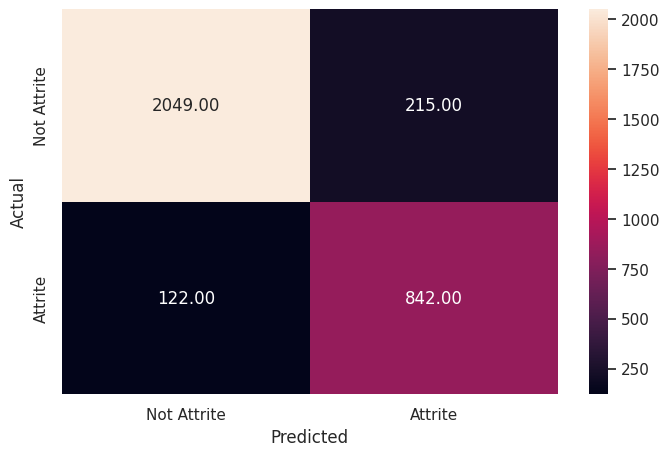

In [ ]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(x_train)

metrics_score(y_train, pred_train_dt)

**Observation:**
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



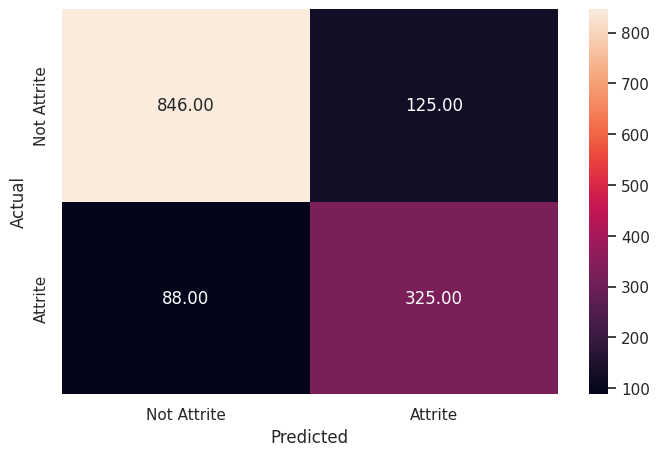

In [ ]:
#cross validating the model on test set.
pred_test_dt = model_dt.predict(x_test)
metrics_score(y_test, pred_test_dt)

###$$Observation$$
1. As explained in previously we want to increase Recall value.
2. We want to predict whether a lead will become paid customer (Flag=1) using the provided information or not (flag=0)
3.  For Test data, the Recall for Predicting flag=1 class is around 87% indicating that there are few rows (13%) that are wrongly predicted as “Flag=0” i.e. False Negatives .
4. Recall for test data is 79%, indicating that there are few rows (21%) that are wrongly predicted as “Flag=0” i.e. False Negatives.
4. Although the recall value for both test and train is good and within 10% ,a slight degree of overfitting is observed on the test data.
5. This subtle gap underlines an opportunity for fine-tuning, aiming to harmonize performance and precision.
6. Our secret weapon? Tweaking the model's parameters using hyperparameters, bringing balance to the force and enriching the model's capabilities.

Prior to embarking on tree pruning, let's engage in the art of visualizing the decision tree and immersing ourselves in the intricacies of its decision rules. This visual exploration promises insights into the model's decision-making process and sets the stage for informed pruning decisions.

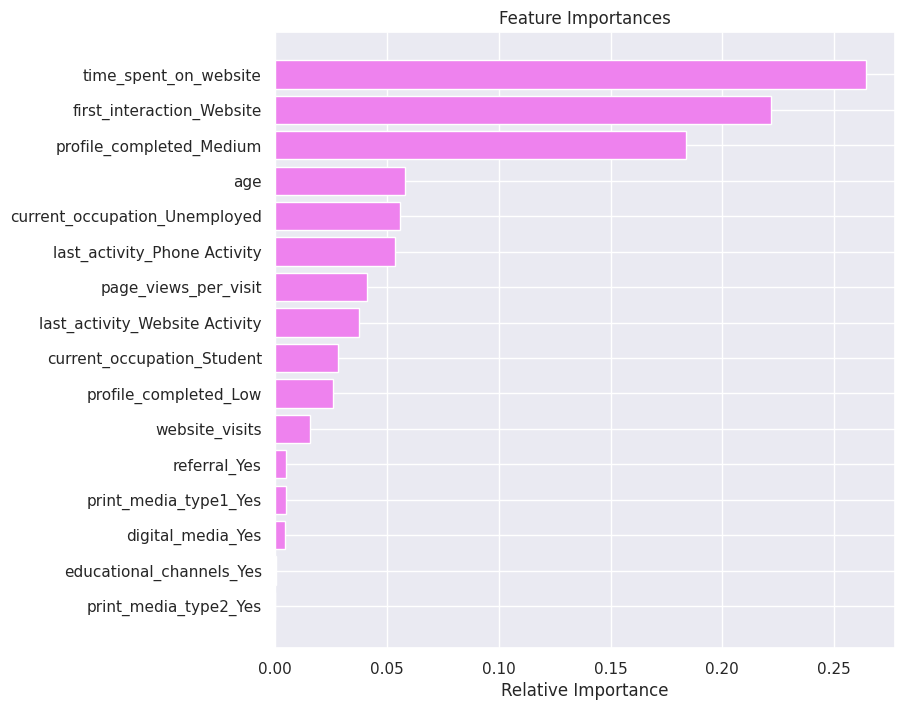

In [ ]:
# Importance of features in the tree building

feature_names = list(x_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###$$**Observation**$$
1. time spent on website, first interaction , Profile completed  are some of the major variables which are drivinf the target variable.
2. This is in consistent with our previous data analytics findings, which also maked sense, people who are half completing their profile are spending more time on the website and have higher chances of buying the products and becoming paid customers, because they are carefully filling all the details asked correctly which might not be true for leads who are completing their profile by just randomly filling all the wrong details or Leads who are not filling any  details.
3. variable like Print media, digital media, website visits are some of the non driving factors in the detemining of the target outcome.

##Let's plot the tree and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to max_depth = 4

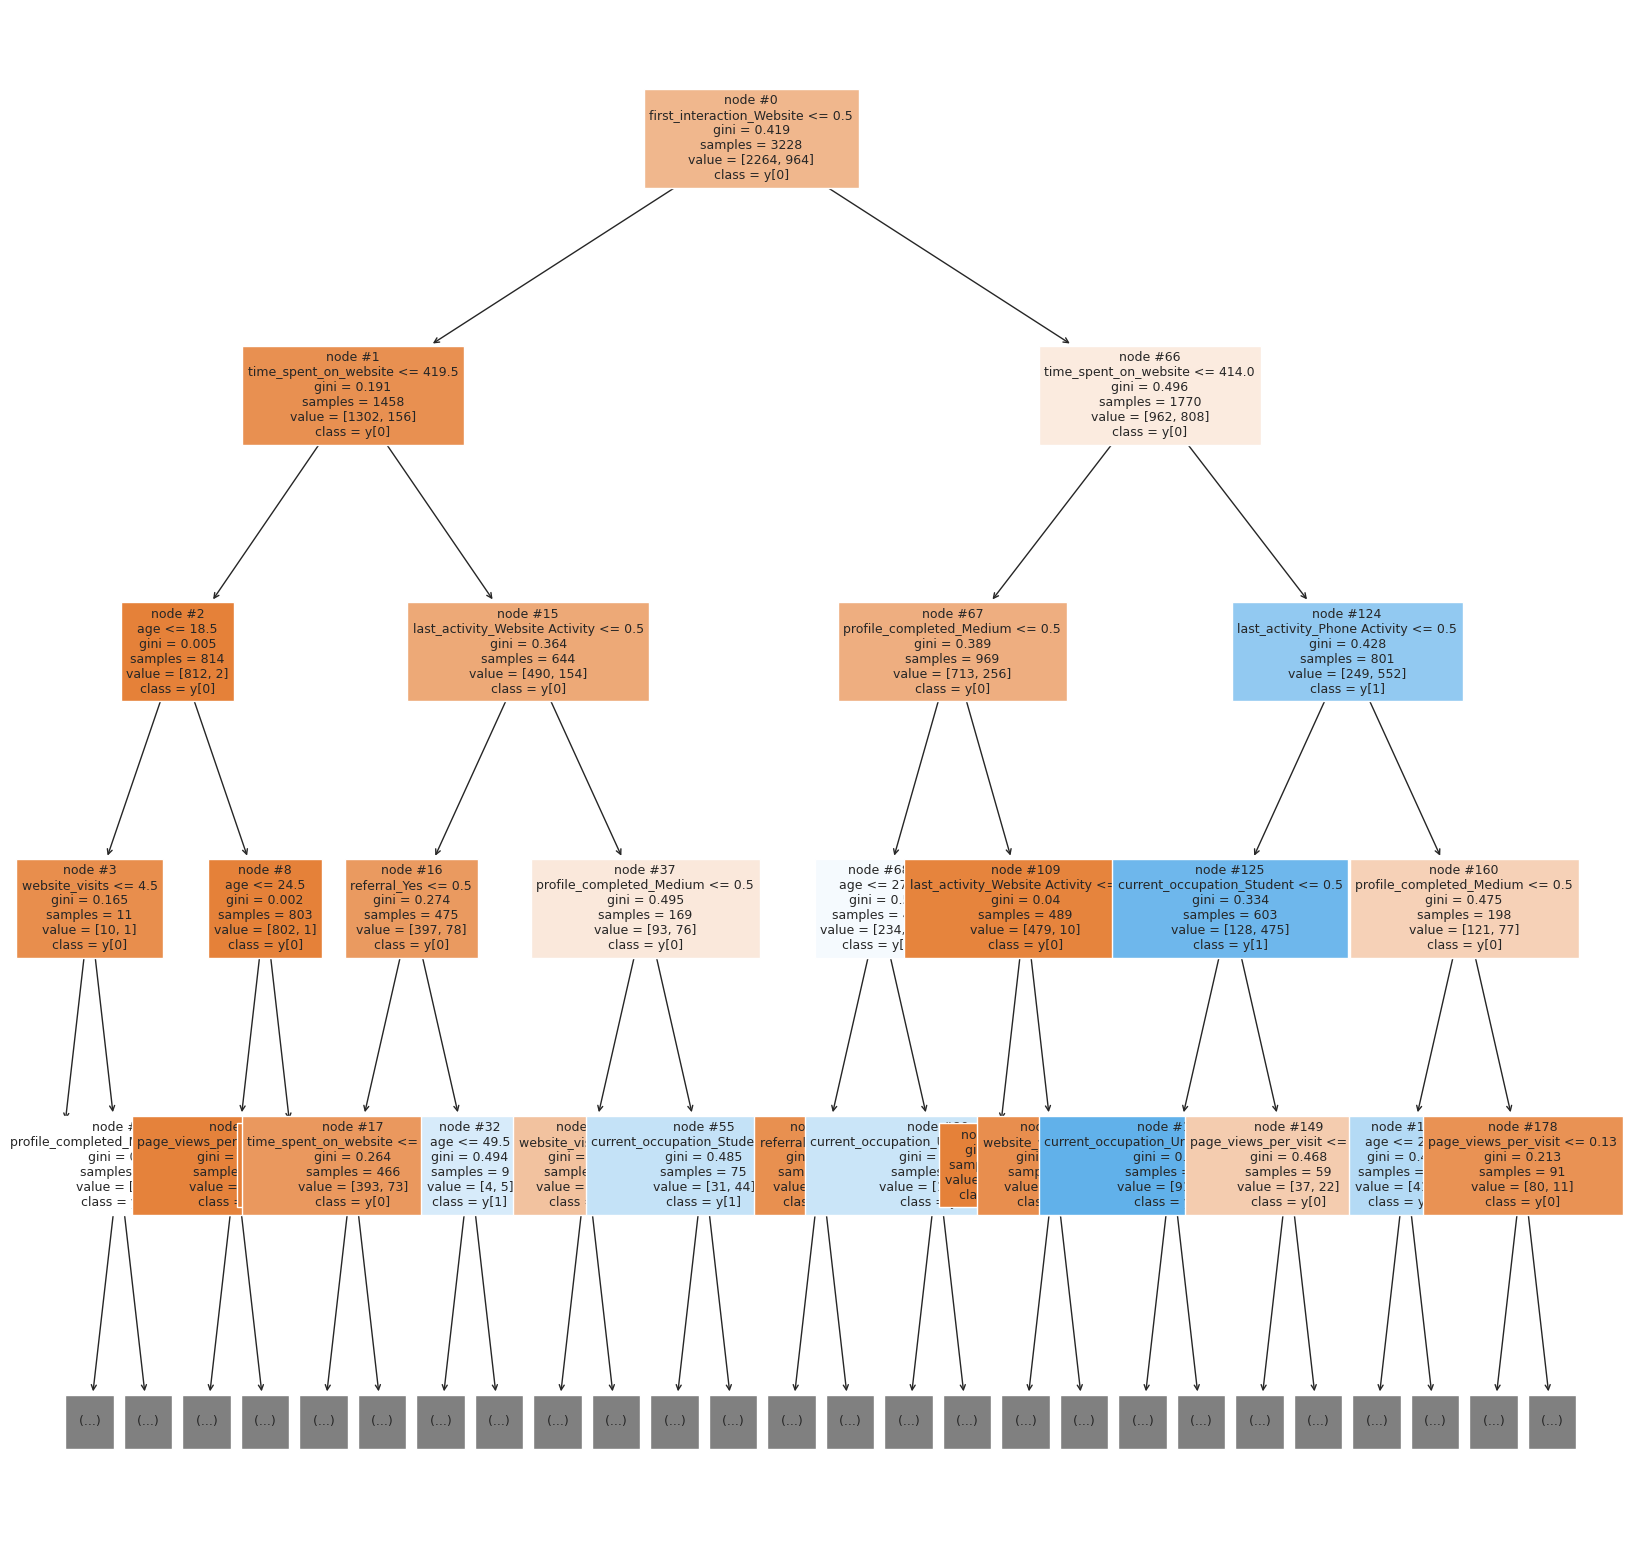

In [ ]:
features = list(x_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

###**Hyper parameter tuning of Decision tree**.

Hyperparameters are the parameters that govern the entire training process. Their values are set before the learning process begins. They have a significant effect on the model’s performance. The process of finding optimal hyperparameters for a model is known as hyperparameter tuning. Choosing optimal hyperparameters can lead to improvements in the overall model’s performance and can help in reducing both overfitting and underfitting.

**Types of Hyperparameter Tuning**
Some models consist of a huge number of hyperparameters, and finding the optimal set of hyperparameters can be a very time-consuming process. To make the process efficient, the most commonly used methods are,

1. Grid Search
2. Random Search


**Grid Search**

Grid search is a technique used to find the optimal set of hyperparameters for a model from the provided search space.

Let's understand how grid search works, with an example

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/gridsearch.png)


Let the grey box above be set of all possible hyperparameters
Let these black circles indicate the search space
Grid search will iterate over all black circles in a sequence
And finally gives the best set of hyperparameters based on the best score obtained
Grid Seach doesn’t work well on large search spaces. It will find the best set of hyperparameters but at a high cost. Grid search is best used when we have small search space. We can use a grid search to get the best possible results when we don’t have any time constraints, but when we have time constraints, it’s better to go with the random search.

Random Search
Random Search is another technique to find the best set of hyperparameters which takes lesser time than grid search

**Random search** is very similar to grid search, the difference is that in the random search,

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/randomsearch.png)

Here we will define the number of iterations to search. Not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. Also, the set of hyperparameters is not searched sequentially. So out of the entire search space of hyperparameters, only a certain number of sets of hyperparameters will be checked randomly.

Random SearchWorks well on large search spaces and gives better results than grid search but it doesn’t guarantee to find the best set of hyperparameters.

**Tuning Models**
We will tune Decision Trees and Random Forest models. For tuning, we will only use Grid Search.

Here are some of the parameters,

**1) Criterion{“gini”, “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**2) max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**3) min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.



In [ ]:
# Choose the type of classifier
#model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
dtree_estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



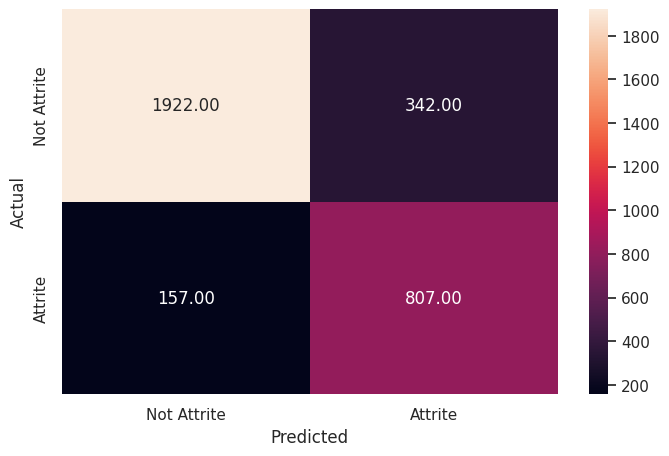

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



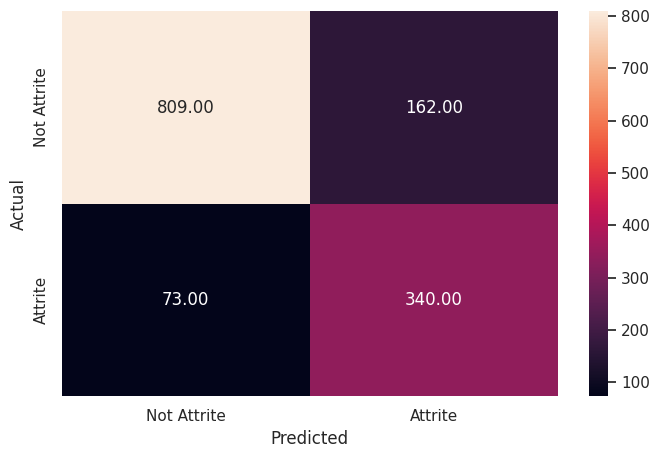

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

###$$**Observation**$$

1. The tuned model is  performing well in comparison to the model with default values of hyperparameters.
2. This model is not overfitting the training data and gives approximately the same result on the test and train datasets.
3. Recall for test set has gone up significantly from 79% to 82%  in comparison to the previous model which means the tuned model will give a high number of True positives, and less false negatives, i.e., this model will predict the leads more accurately who are going to get converted in to the paid customer (flag = 1) and this will increase the revenue of the Extraalearn.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

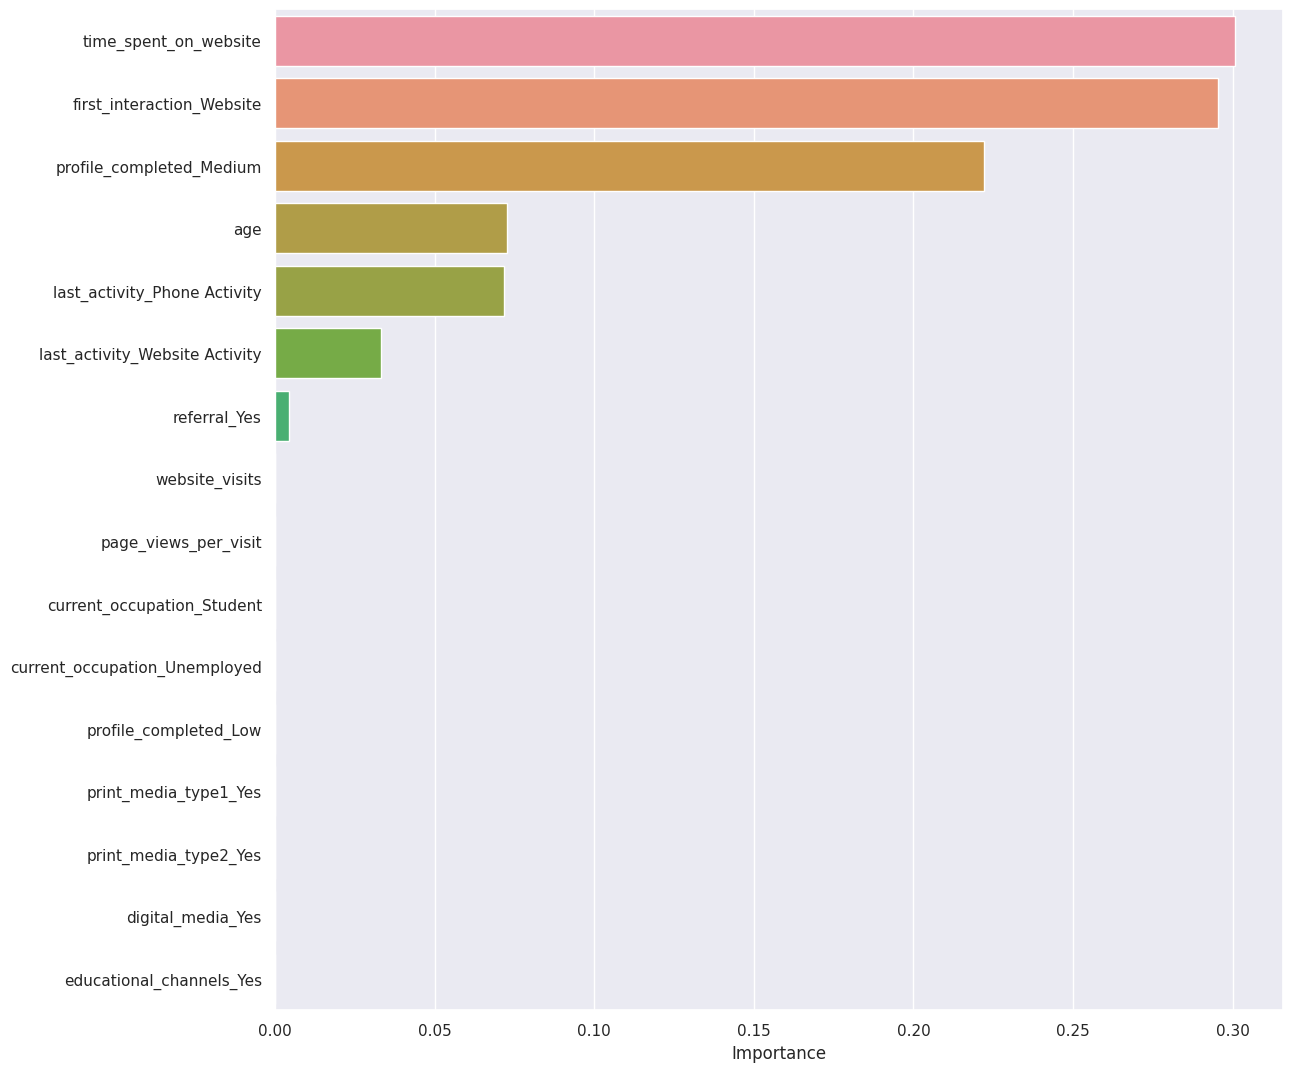

In [ ]:
importances = dtree_estimator.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

###$$**Observation**$$
1. time spent on website, first interaction , Profile completed  are some of the major variables which are drivinf the target variable.
2. Other variables like referal_yes and last_activity _website and last_activity_phone are also signficant variable in driving target varibale.
2. This is in consistent with our previous data analytics findings, which also makes sense, people who are completing their profile are spending more time on the website and have higher chances of buying the products and becoming paid customers, because they are carefully filling all the details asked correctly which might not be true for leads who are completing their profile by just randomly filling all the wrong details or Leads who are not filling any  details.
3. variable like Print media, digital media, website visits are some of the non driving factors in the detemining of the target outcome.

##*2. Random Forest*

Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction.
The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems)


In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



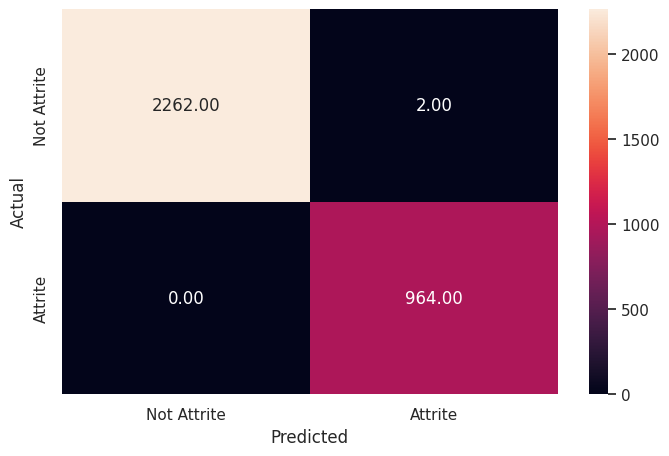

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**$$Observation:$$**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



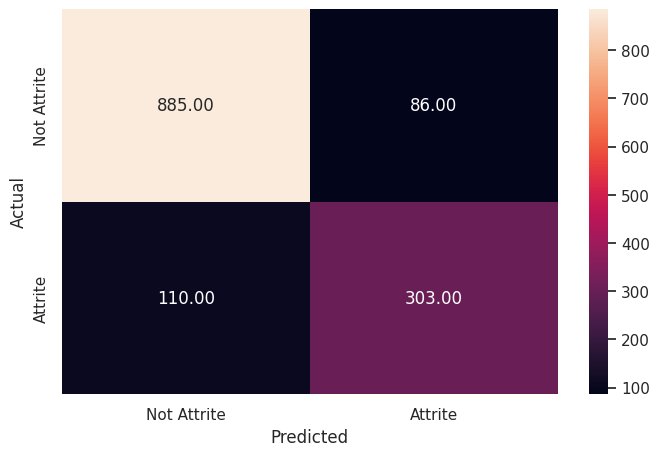

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.73 for class 1.
- Precision is high for the test data as well.

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance'>

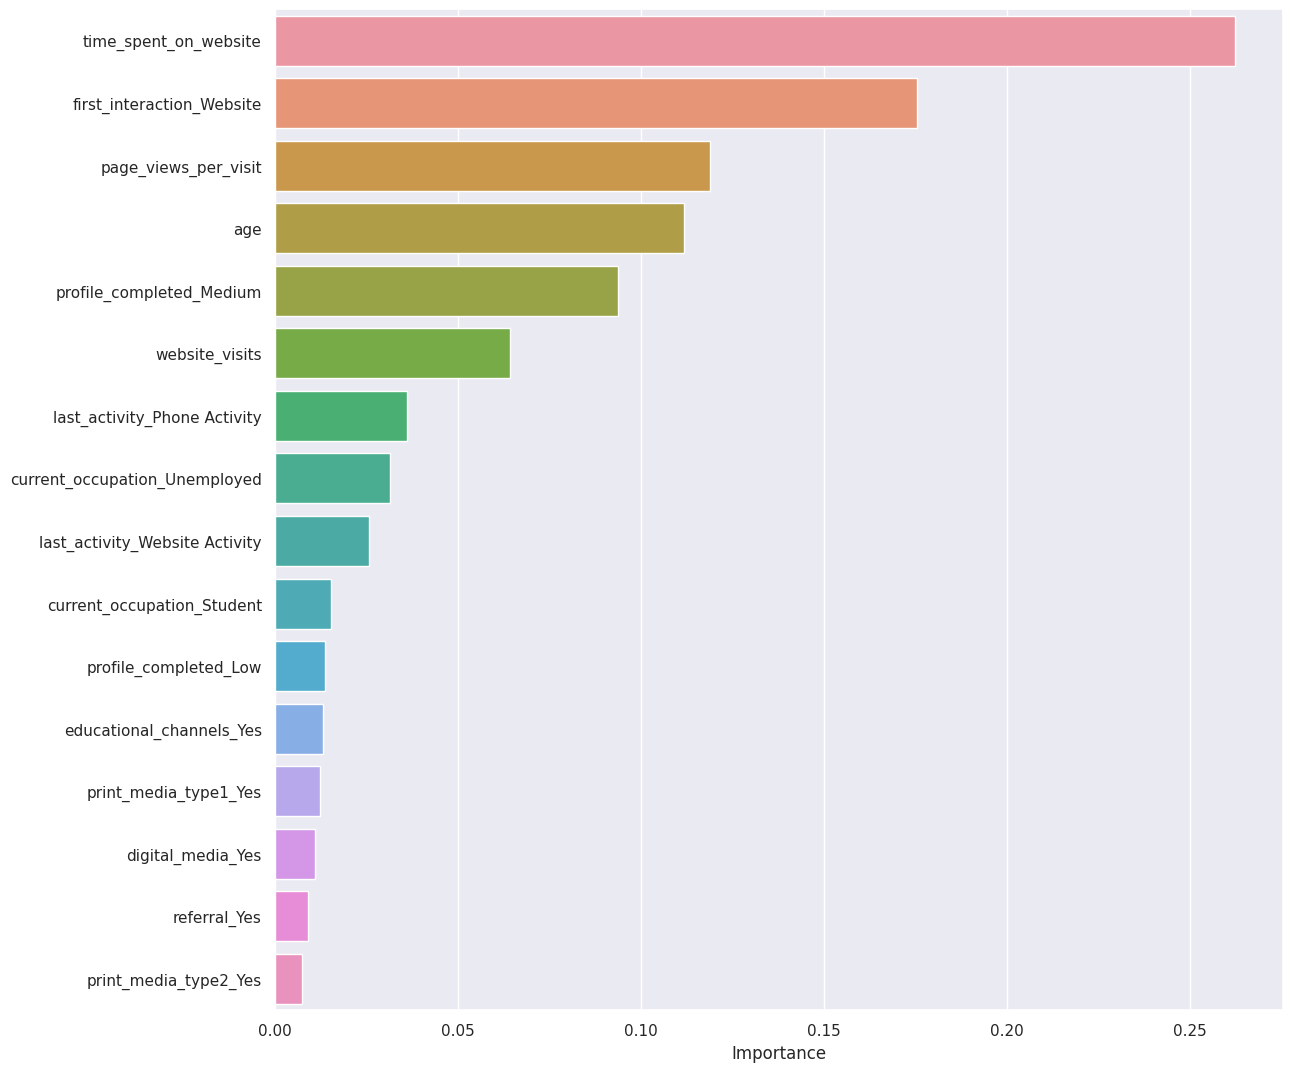

In [ ]:
importances = rf_estimator.feature_importances_

columns = x_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are `first interaction Website` and `time spent on website`.

###**Hyperparameter tuning of Random forest**

We will tune the hyperparameters of Random forest to increase the performance and reduce overfitting.

**Here are some of the parameters,**

**n_estimators:** The number of trees in the forest.

**min_samples_split:** The minimum number of samples required to split an internal node.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}:** The number of features to consider when looking for the best split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier( random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2264
           1       0.94      0.89      0.91       964

    accuracy                           0.95      3228
   macro avg       0.95      0.93      0.94      3228
weighted avg       0.95      0.95      0.95      3228



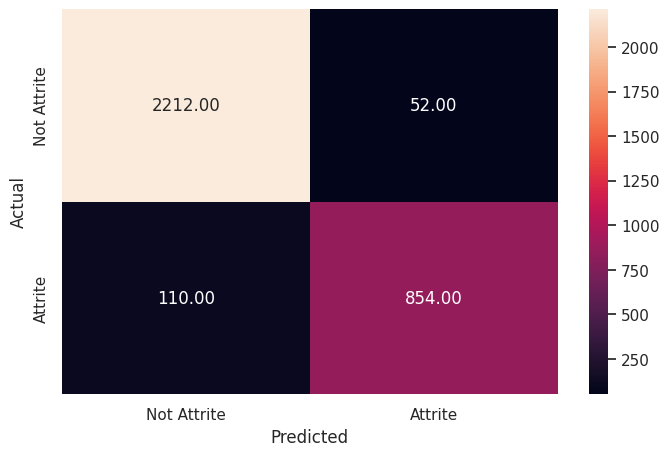

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



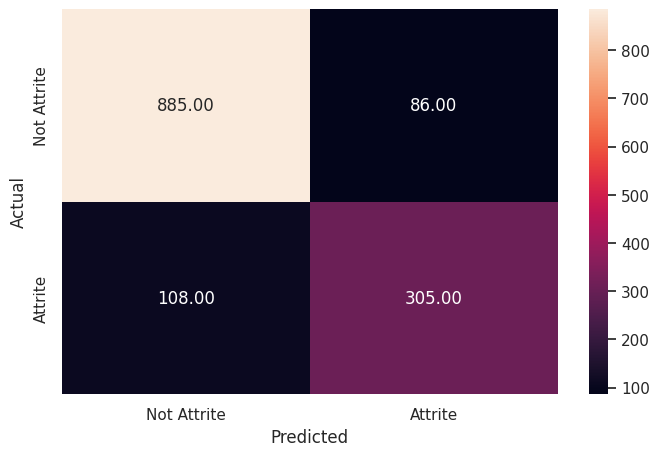

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

$$**Observations:**$$

The tuned model is also overfitting the training dataset, and it shows a similar performance on the test dataset like untuned random forest.


<Axes: xlabel='Importance'>

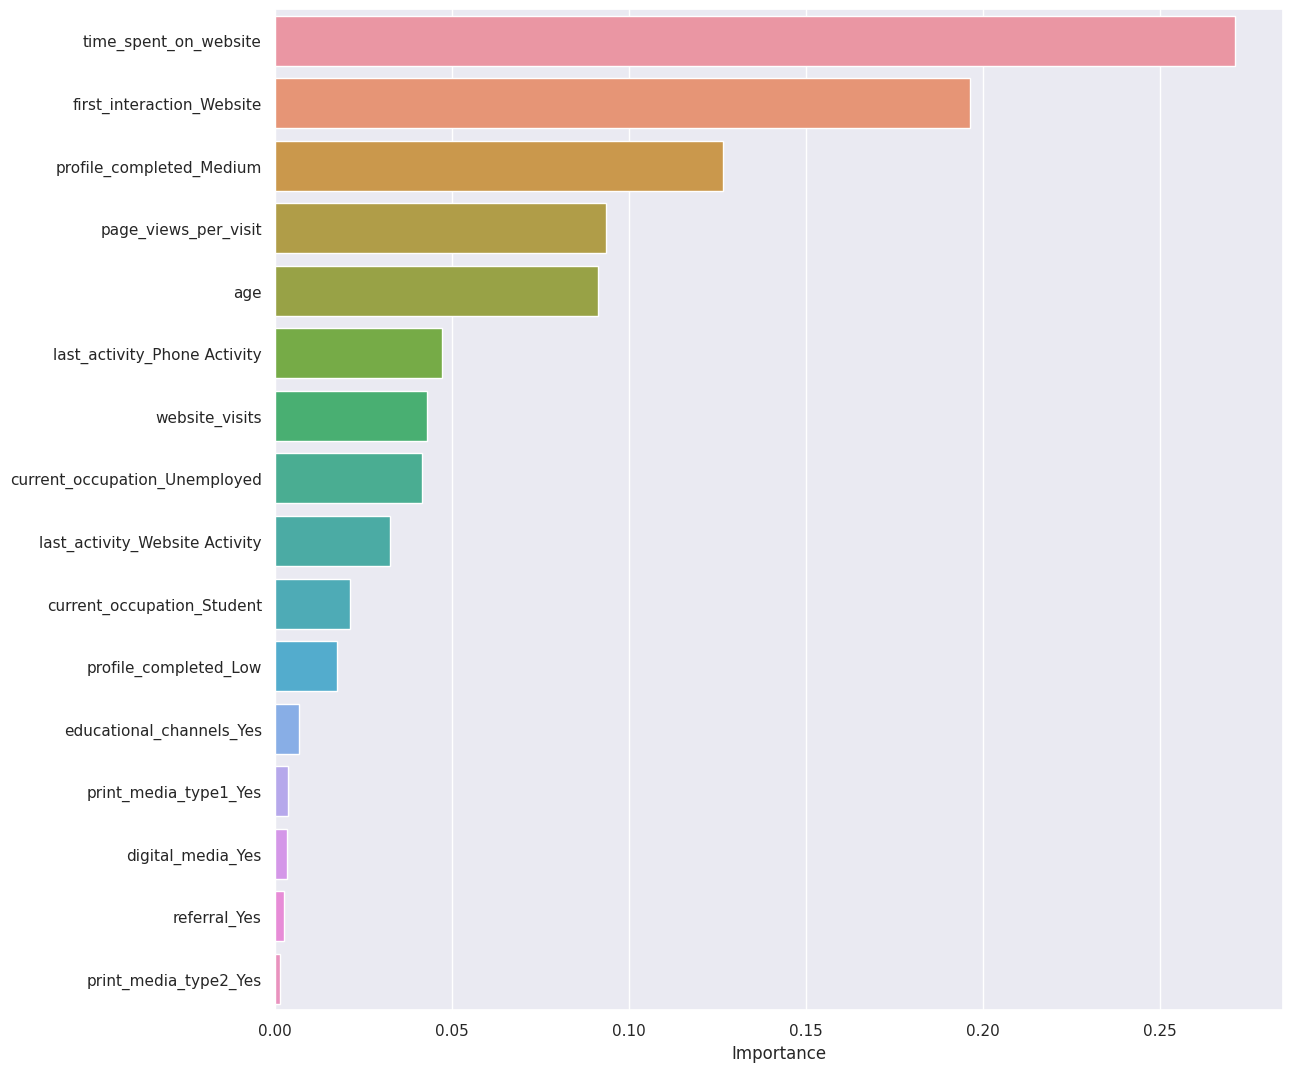

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**
- The tuned Random Forest further verifies the results from the untuned random tree that the most important features are `first interaction Website` and `time spent on website`, "profile completed" and "page views".

#$$**Final Model**$$

**1. Decision tree with Hyper parameter tuning is the best model amongst all model, it is more generalised model giving the best recall value.**

**2. Recall value of train and test are 84% and 82% respectively, that means it id efficietnly determining the true positives in the data sets by decreasing the false negatives. Now Extraalearn team can target these otherwise neglected leads who have high possibilty of buying courses and nurture them.**

**3. Precision for train and test are 70% and 68% respectively which are also pretty good results, It is effeciently decresing the false positives in the data, which could have resulted in wastage of time and human resourses by nurturing leads who are not likelt to get converted into paid customer.**
**4. All the 4 models are pointing towards the 4 variables as most significant varibale in deciding target variable.**
**and these are**

**a) Time spent on website.**

**b) first interaction .**

**c) Profile completed.**

**d) Age .**


## **Actionable Insights and Recommendations**
**Insights**
1. How much profile completed by leads, gives good idea about their willingness to buy the course with extra learn.
2. Leads awho are spending more time on Website are probably going to buy Extraalearn product.
3. Leads in age group between 50 to 60 years are more intersted in buying extraalearn courses.
4. Professionals are top leads in number who are getting converted into paid customer.
5. Referrals are doing good job in Bringing in leads with high possibilty of getting converted into paid customer.
6. Extralearn are attracting very less number of leads through advertising channels, but those who come in through these channels 50 % of them buy the product, hence they should advertise more about themselves on all possible channels, but primarily on newspaper and educational channels.

**Recommendations:-**
1. The Company should target leads who have fully completed their profiles and then nurture them, as they have higher odds of becoming a customer. The Company should add all the required fields in the profile form, which can help them determine the current status of the lead and the courses they are interested in, for enabling the Precise and relevant calls made by marketing team or sales representative to the leads.
2. Leads, who interacted through the website, are more likely to buy the course and such leads should be targeted by the company. Company should design their website in such manner that all relevant information for a prospective students is easily available, a chat boat and FAQ will make the website more interactive thereby enhancing the possibilities of successful enrolment.
3. Specific effort should be made for referral candidates by actively engaging with them and explaining them thoroughly about the course structure and its fees because these leads have higher chances of becoming a customer.
4. It is also observed that working professional have higher chances of buying the courses. In order to attract and accommodate more and more working professionals the conduct of the course should be designed with sufficient flexibility. This is particularly important for them, considering their time constraints due to professional commitments, The course timings should not act as hindrance to their quest of upskilling or knowledge enhancement.
5. Company should also emphasise on the selection of programmes being offered as their bouquet should be relevant to present time and industry requirement. Programme prerequisite should be lenient in order to maximise the enrolments.
6. “A Satisfied Customer is your best Marketing Agent”, So the quality of student support services along with the course content are of paramount. This will result in formation of pleased and strong alumni with good reviews and large number of referrals.
7. Additional data regarding course fee, prerequisite of the courses, duration of the courses offered, affiliations can be collected and analysed to gain better insights.


##**Wrap up Note**##
Finally we have reached the end of this project. As we wrap up this project, I can't help but reflect on the truly rewarding experience it has been. The project's intricate nature and the array of challenges it posed have provided me with ample learning opportunities. I eagerly anticipate applying these newfound insights to future ventures and further exploring the boundless potential of data analysis.

This project underscores the central importance of data analysis in the online education market. It serves as an illustration of how different factors can empower companies with the means to identify leads highly likely to enroll in their courses, thus enhancing their overall management strategies.
